# Práctica 1 - Self-Organising Maps - COLORES
## Preparación de entorno
#### Importar librerías de código

In [1]:
%reset
# from __future__ import division

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches

%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


#### Dataset que se va a utilizar para el entrenamiento

In [2]:
# Código para obtener el Dataset que se va a usar en el entrenamiento
#datos = np.random.randint(valor_min, valor_max, (valores_color, num_colores))
# Matriz de 100 colores

datos = np.random.randint(0,256,(100,3))
#Mostrar matriz
print("Datos que se van a usar en el entrenamiento")
#print(datos)

Datos que se van a usar en el entrenamiento


## SOM Setup
#### Variables definidas por el alumno

In [3]:
# Inicializa tamaño del mapa de Kohonen, número de iteraciones y learning rate
# Inicializa normalizar_datos dependiendo de si tienes que normalizar los datos o no
lado_mapa = 40        #numero de neuronas por lado
periodo = 15000       #iteracciones totales
learning_rate_Inicial = 0.03 #Coeficiente de aprendizaje inicial.

learning_rate = learning_rate_Inicial #Coeficiente de aprendizaje .

#Matriz de lado*lado para el numero de neuronas
#matriz_neuronas = [[0] * lado_mapa for i in range(lado_mapa)]

#Crea una matriz de pesos con valores random entre 0 y 1. Usa la función random.random de la librería NumPy
#matriz_pesos = np.random.random((dimensiones de la matriz de pesos))
matriz_pesos = np.random.random(size = (lado_mapa, lado_mapa,3))
matriz_neuronas = matriz_pesos  
#Si queremos normalizar datos: True, si no: False
normalizar_datos = True

# Calcula el vecindario inicial. Debe ser la mitad del lado del mapa de Kohonen
vecindarioInicial = int(float(lado_mapa*0.5))
vecindario = vecindarioInicial

print("Lado del mapa", lado_mapa)
print("Numero de neuronas del mapa de Kohonen", lado_mapa * lado_mapa)
print("Coeficiente de aprendizaje inicial", learning_rate)
print("Las neuronas van aprendiendo menos, por lo que el coeficiente final de aprendizaje se supone que es 0")
print("El vecindario es", vecindario)
print("Matriz de pesos")
#print(matriz_pesos)
print()

#Variables para CLASIFICACION

#guardar en cada neurona el ultimo patron clasificado
mapa_clasificacion = np.zeros((lado_mapa,lado_mapa,len(datos[0])))

#Mapa_activacion, +1 es la neurona ganadora, 0 neurona no ganadora
mapa_activacion = np.zeros((lado_mapa,lado_mapa))

#Mapa de distancias para las neuronas con activacion > 0, la distancia
#media de todos los patrones de la clase con su vector de pesos
mapa_distancias = np.zeros((lado_mapa,lado_mapa))




Lado del mapa 40
Numero de neuronas del mapa de Kohonen 1600
Coeficiente de aprendizaje inicial 0.03
Las neuronas van aprendiendo menos, por lo que el coeficiente final de aprendizaje se supone que es 0
El vecindario es 20
Matriz de pesos



#### A partir de este punto solo hay cálculos. No se introducen más valores "a mano"

In [4]:
# Establece el numero de entradas del mapa y el número de datos que se van a usar para entrenar. 
# Utiliza una función que obtenga automáticamente los valores a partir del Dataset.
num_entradas = len(datos[0]) #Numero de entradas
num_datos = len(datos) #Numero de datos a entrenar por iteraccion
print("El numero de entradas es: ",num_entradas,", que también es el número de neuronas de nuestra capa de entrada")
print("El numero de datos que se van a usar para entrenar por iteracion es: ", num_datos)

# Normaliza los datos si fuese necesario dividiendo cada dato por el máximo en la matriz
#normalización = ( x – min(x) ) / ( max(x) – min(x) )
if normalizar_datos:
    min_datos = datos.min()
    max_datos = datos.max()
    datos = (datos - min_datos) / (max_datos - min_datos)
#print(datos_aux)

#if normalizar_datos:
 #   datos = np.asfarray(datos, float)
  #  for i in range(num_datos):
   #         datos[i] = datos[i]/np.sqrt((datos[i][0]*datos[i][0]+datos[i][1]*datos[i][1]+datos[i][2]*datos[i][2]))          
print("Dato minimo de nuestro DataSet", min_datos)
print("Dato maximo de nuestro DataSet", max_datos)
print("Matriz de Datos normalizada")
#print(datos)

El numero de entradas es:  3 , que también es el número de neuronas de nuestra capa de entrada
El numero de datos que se van a usar para entrenar por iteracion es:  100
Dato minimo de nuestro DataSet 0
Dato maximo de nuestro DataSet 255
Matriz de Datos normalizada


#### Funciones para entrenar/clasificar

In [5]:
# Función para encontrar la BMU
"""
   Encuentra la BMU para un patrón de entrada.
   Entradas: (patrón_de_entrada, matriz_de_pesos, número_de_entradas)
   Salidas:  (bmu, bmu_idx) tupla donde
               bmu: vector de pesos de la neurona ganadora
               bum_idx: coordenadas de la neurona ganadora
"""

#Devuelve el peso de la neurona ganadora (más cercana al vector de entrada (dato)).

def calcular_bmu(patron_entrada, matriz_pesos, m):  
    #Inicialización de las variables necesarias
    dist = [0, 0, 0]
    CompI = 0
    CompJ = 0
    bmu = [0] * m
    bmu_idx = [0,0]

    #Cálculo de la distancia más corta
    for i in range (matriz_pesos.shape[0]):
        for j in range (matriz_pesos.shape[1]): #Bucles para recorres las dimensiones 10*10 de la matriz(o n*n)
            for k in range (0, m):#Para recorrer los 3 componentes de cada neurona
                dist[k] = np.array((patron_entrada[0][0][k] - matriz_pesos[i, j, k])**2)  #Cálculo de la distancia euclidea
            
            # La distacia ecuclidea final será la suma de todas las distancias de las entradas de la neurona.
            distancia_euclidea = sum(dist)

            # para tener un primer mínimo con el que comparar el resto.
            if i == 0 and j == 0:
                
                # neurona_ganadora nos sirve para realizar comparaciones, cada vez que encontremos una distancia menor se 
                # actualizará el valor de la neurona ganadora con esa distancia.
                neurona_ganadora = distancia_euclidea
                # bmu es un vector que guarda la matriz de pesos de la neurona ganadora.
                bmu = np.array(matriz_pesos[i, j])
                # bmu_idx es un vector que guarda la posicion de la neurona ganadora.
                bmu_idx = np.array([i, j])
            
            # Si no es la primera vez que se ejecuta el if entraremos en el else y se hará una comparación.
            else:
                
                # Comparamos la distancia euclídea recién calculada con la que es nuestra neurona ganadora. Si es menor querrá
                # decir que hemos encontrado una neurona mejor.
                if distancia_euclidea < neurona_ganadora: 
                    
                    neurona_ganadora = distancia_euclidea
                    bmu = np.array(matriz_pesos[i, j])
                    bmu_idx = np.array([i, j])

    return bmu, bmu_idx


In [6]:
#Modiifca los pesos de la matriz de pesos (de la matriz de neuronas).
#1º Calcula el vector diferencia entre el vector dato y el peso de la neurona ganadora. Se le aplica al peso de la neurona ganadora multiplicado por el learning_rate
#2º Modifica el vecindario.

def AjustarMatrizPesos(Coords, vectorDato, learning_rate, matriz_neuronas, vecindario):   
    for i in range(matriz_neuronas.shape[0]):
        for j in range(matriz_neuronas.shape[1]):
            #a1=Coords[0]-int(float(vecindario/2))
            #a2=Coords[0]+int(float(vecindario/2))
            #b1=Coords[1]-int(float(vecindario/2))
            #b2=Coords[1]+int(float(vecindario/2))
            #print(a1,a2,b1,b2)
            if(i>=Coords[0]-int(float(vecindario/2)) and i<=Coords[0]+int(float(vecindario/2)) and j>=Coords[1]-int(float(vecindario/2)) and j<=Coords[1]+int(float(vecindario/2))):
                vectorDiferencia = vectorDato[0][0] - matriz_neuronas[i][j]    #(Xi - Wi,j(t))
                distancia = DistanciaEuclidea(matriz_neuronas[i][j], matriz_neuronas[Coords[0]][Coords[1]])    #(dj)          
                matriz_neuronas[i][j] = matriz_neuronas[i][j] + (learning_rate*decay(distancia,vecindario)*vectorDiferencia)    #Wi,j(t+1)=Wi,j(t)+n(t)*aj*(Xi-Wi,j(t))  
                
                #print("I,J=",i,j)
                #print("Dist-Neur-BMU=",distancia)                
                #print("Dist-Neur-Dato=",vectorDiferencia)
                #print("Vpesos["+i+"]["+j+"]=",matriz_neuronas[i][j])

In [7]:
def AjustarMatrizPesos_Carlos(Coords, vectorDato, learning_rate, matriz_neuronas, vecindario):
    #Actualizamos el vector de pesos de la BMU
    Pesos_Nuevos = matriz_neuronas[Coords[0]][Coords[1]] + learning_rate * decay(0,vecindario)*(vectorDato[0][0] - matriz_neuronas[Coords[0]][Coords[1]])
    #Supuestamente esta actualizado
    matriz_neuronas[Coords[0]][Coords[1]] = Pesos_Nuevos    
    #Vecindario->Derecha
    TopeDerecha = lado_mapa
    if((vecindario + Coords[0])< lado_mapa):
        TopeDerecha = round(vecindario + Coords[0]) 
    #Vecindario<-Izquierda
    TopeIzquierda = 0
    if((Coords[0] - vecindario) > 0):
        TopeIzquierda = round(Coords[0] - vecindario)
    #Arriba
    TopeArriba = lado_mapa
    if((vecindario + Coords[1])<lado_mapa):
        TopeArriba = round(vecindario + Coords[1])
   #Abajo
    TopeAbajo = 0
    if((Coords[1] - vecindario)>0):
        TopeAbajo = round(Coords[1]-vecindario)

    #Se recorre desde la esquina inferior izquierda hasta la esquina superior derecha
    #Es un cuadrado que nace desde la bmu    
    for i in range(int(TopeIzquierda),int(TopeDerecha)):
        for j in range(int(TopeAbajo),int(TopeArriba)):
            if(i != Coords[0] or j != Coords[1]):
                DisEuclideaV = DistanciaEuclidea (matriz_neuronas[Coords[0]][Coords[1]],matriz_neuronas[i][j])
                if(DisEuclideaV <= vecindario):
                    matriz_neuronas[i][j] = matriz_neuronas[i][j] + learning_rate * decay(DisEuclideaV,vecindario)*(vectorDato[0][0]-matriz_neuronas[i][j])
    
    matriz_neuronas[Coords[0]][Coords[1]] = Pesos_Nuevos            
 #  print(Coords)
 #   print(matriz_neuronas)

In [8]:
#Entrada: 2 vectores de igual dimensión (sino devuelve null)
#Salida: distancia euclidea en un float.

def DistanciaEuclidea(v1, v2):
    distE=0
    
    if len(v1)!=len(v2):
        return null
    
    for i in range(len(v1)):
        distE = distE + (v1[i]-v2[i])*(v1[i]-v2[i])
        
    distE = np.sqrt(distE)
    
    return float(distE)

In [9]:
# Función para calcular el descenso del coeficiente de aprendizaje (eta)
"""
   Calcula el Learning Rate (eta) que corresponde a la i-ésima presentación.
   Entradas: (learning_rate_inicial, iteracion, período)
   Salidas:  learning_rate para la iteración i

"""
def variacion_learning_rate(lr_inicial, iteracionActual, n_iteraciones):

#    learning_rate = lr_inicial*(1-(iteracionActual/n_iteraciones))  #En teoría esta es la ecuación del learning_rate a código, no se si va algo más
    learning_rate = lr_inicial + (-lr_inicial/n_iteraciones)*iteracionActual
    return learning_rate

In [10]:
# Función para calcular el descenso del vecindario (v)
"""
   Calcula el vecindario  (v) que corresponde a la i-ésima presentación.
   Entradas: (vecindario_inicial, iteracion, período)
   Salidas:  lvecindario para la iteración i

"""
def variacion_vecindario(vecindario_inicial, iteracionActual, n_iteraciones):
    
    VecindarioActual = 1 + vecindario_inicial*(1-(iteracionActual/n_iteraciones))
    
    return VecindarioActual

In [11]:
# Función para calcular el descenso del coeficiente de aprendizaje (eta) en función de la distancia a la BMU
"""
   Calcula la amortiguación de eta en función de la distancia en el mapa entre una neurona y la BMU.
   Entradas: (distancia_BMU, vecindario_actual)
   Salidas:  amortiguación para la iteración

"""
def decay(distancia_BMU, vecindario_actual):
    return np.exp(-distancia_BMU**2 / (2*vecindario_actual**2))

In [12]:
# ERROR CUANTIFICACIÓN 

# Mapa de distancias.

def ImprimirErrores():
    contador = 0
    error_cuantificacion = 0
    for i in range(mapa_distancias.shape[0]):
        for j in range(mapa_distancias.shape[1]):
            if mapa_distancias[i][j] != 0:
                contador+=1
                error_cuantificacion += mapa_distancias[i][j]

    error_cuantificacion = error_cuantificacion/contador
                
    print("El error de cuantificación del mapa de kohonen es de una distancia de: ",error_cuantificacion)

    #El error topológico se debe cálcular en función de los datos de entrada, al no guardar estos datos
    #trabajamos desde la función de SOM Prueba, y se calcula allí.
    print("El error topológico es de: ", error_topologico)




In [13]:
#Cálculo del error topológico.
def Error_Topologico(matriz_pesos, muestra):
    dist=999
    distaux=0
    distmin2 = 999
    CompIClasAnterior = 0
    CompJClasAnterior = 0
    flgVecinas = 0    #Si la 1ª y 2ª BMU son vecinas entre si. 0 si sí lo son, 1 si no.
    
    #Calculamos la 1ª BMU y la 2ª BMU:
    for i in range (matriz_pesos.shape[0]):
        for j in range (matriz_pesos.shape[0]): #Bucles para recorres las dimensiones 10*10 de la matriz(o n*n)
            distaux = 0
            for k in range (len(datos[0])):#Para recorrer los 3 componentes de cada neurona
                distaux = distaux + (matriz_pesos[i, j, k] - muestra[k])**2  #Cálculo de la distancia
            if distmin2>distaux and distaux>dist:
                distmin2 = distaux
                CompIClasAnterior = i
                CompJClasAnterior = j
            if dist>distaux: #Vamos guardando progresivamente la distancia más pequeña y las coordenadas  de la neurona que es
                dist = distaux
                CompIClas = i
                CompJClas = j
    
    print("[",CompIClasAnterior,",",CompJClasAnterior,"]")
    print("[",CompIClas,",",CompJClas,"]")
    
    if ((CompIClas == CompIClasAnterior+1 or CompIClas == CompIClasAnterior-1) and CompJClas == CompJClasAnterior) or (CompIClas == CompIClasAnterior and (CompJClas == CompJClasAnterior+1 or CompJClas == CompJClasAnterior-1)) or ((CompIClas == CompIClasAnterior-1) and (CompJClas == CompJClasAnterior+1 or CompJClas == CompJClasAnterior-1)) or ((CompIClas == CompIClasAnterior+1) and (CompJClas == CompJClasAnterior+1 or CompJClas == CompJClasAnterior-1)):
        flgVecinas = 0
    else:
        flgVecinas = 1
    
    print("El flgVecinas = ",flgVecinas)
    
    return flgVecinas

#### Funciones para dibujar la salida de la red

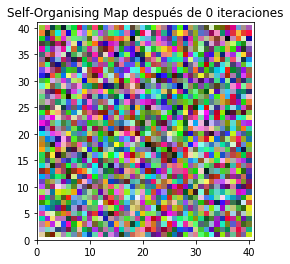

In [14]:
# Función para pintar una matriz de valores como colores RGB

def pintar_mapa(matriz_valores, i):
    fig = plt.figure()
    
    # Establece ejes
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_xlim((0, matriz_pesos.shape[0]+1))
    ax.set_ylim((0, matriz_pesos.shape[1]+1))
    ax.set_title('Self-Organising Map después de %d iteraciones' % i)

    # Dibuja los rectángulos de color RGB
    for x in range(1, matriz_valores.shape[0] + 1):
        for y in range(1, matriz_valores.shape[1] + 1):
            ax.add_patch(patches.Rectangle((x-0.5, y-0.5), 1, 1,
                         facecolor=matriz_valores[x-1,y-1,:],
                         edgecolor='none'))
    plt.show()
    
pintar_mapa(matriz_neuronas, 0)


## SOM Entrenamiento

-----------------------------------------
Iteración Nº:  0
LearningR =  0.03
Vecindario =  21.0
Coord: [24 13]


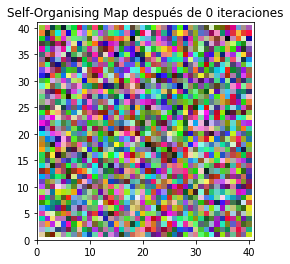

-----------------------------------------
Iteración Nº:  100
LearningR =  0.0298
Vecindario =  20.866666666666667
Coord: [0 3]


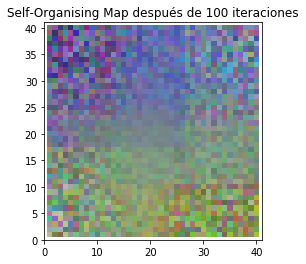

-----------------------------------------
Iteración Nº:  200
LearningR =  0.029599999999999998
Vecindario =  20.733333333333334
Coord: [10  0]


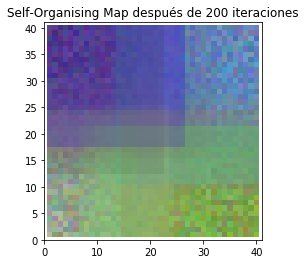

-----------------------------------------
Iteración Nº:  300
LearningR =  0.0294
Vecindario =  20.6
Coord: [36 39]


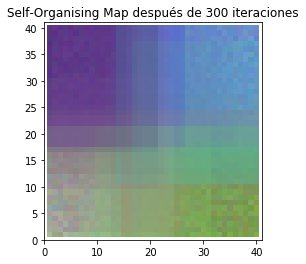

-----------------------------------------
Iteración Nº:  400
LearningR =  0.0292
Vecindario =  20.46666666666667
Coord: [ 1 21]


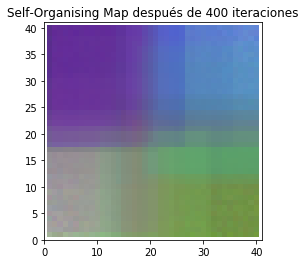

-----------------------------------------
Iteración Nº:  500
LearningR =  0.028999999999999998
Vecindario =  20.333333333333332
Coord: [ 0 24]


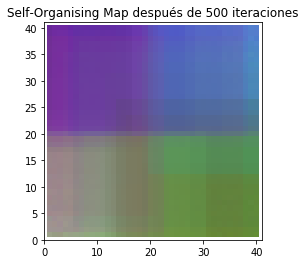

-----------------------------------------
Iteración Nº:  600
LearningR =  0.0288
Vecindario =  20.2
Coord: [ 0 25]


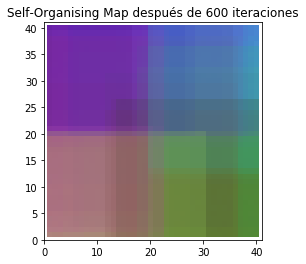

-----------------------------------------
Iteración Nº:  700
LearningR =  0.0286
Vecindario =  20.066666666666666
Coord: [20 19]


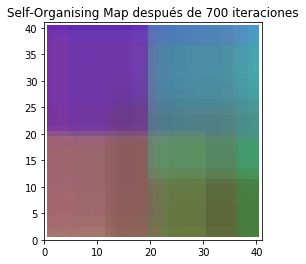

-----------------------------------------
Iteración Nº:  800
LearningR =  0.028399999999999998
Vecindario =  19.933333333333334
Coord: [ 2 18]


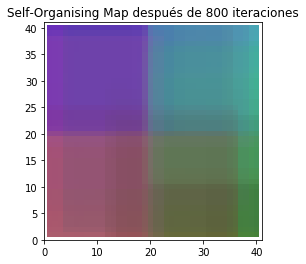

-----------------------------------------
Iteración Nº:  900
LearningR =  0.0282
Vecindario =  19.799999999999997
Coord: [13  0]


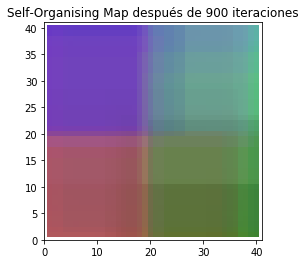

-----------------------------------------
Iteración Nº:  1000
LearningR =  0.027999999999999997
Vecindario =  19.666666666666668
Coord: [38  0]


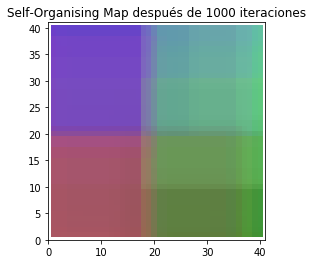

-----------------------------------------
Iteración Nº:  1100
LearningR =  0.0278
Vecindario =  19.53333333333333
Coord: [ 0 39]


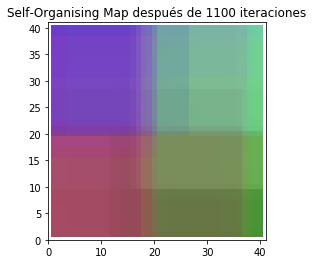

-----------------------------------------
Iteración Nº:  1200
LearningR =  0.0276
Vecindario =  19.400000000000002
Coord: [39 28]


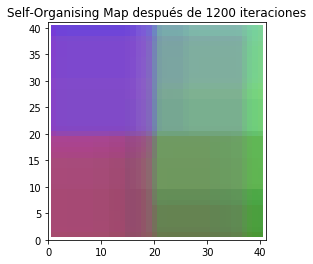

-----------------------------------------
Iteración Nº:  1300
LearningR =  0.0274
Vecindario =  19.266666666666666
Coord: [ 0 19]


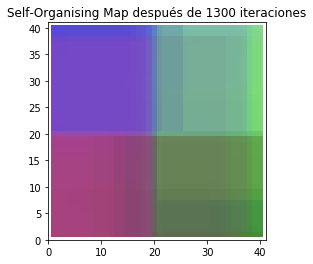

-----------------------------------------
Iteración Nº:  1400
LearningR =  0.0272
Vecindario =  19.133333333333333
Coord: [19  0]


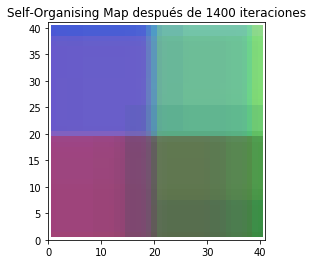

-----------------------------------------
Iteración Nº:  1500
LearningR =  0.027
Vecindario =  19.0
Coord: [11  0]


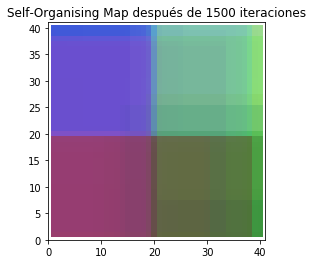

-----------------------------------------
Iteración Nº:  1600
LearningR =  0.026799999999999997
Vecindario =  18.866666666666667
Coord: [18 36]


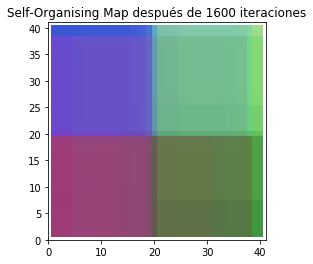

-----------------------------------------
Iteración Nº:  1700
LearningR =  0.0266
Vecindario =  18.733333333333334
Coord: [18 29]


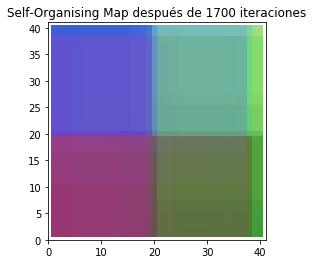

-----------------------------------------
Iteración Nº:  1800
LearningR =  0.0264
Vecindario =  18.6
Coord: [18 18]


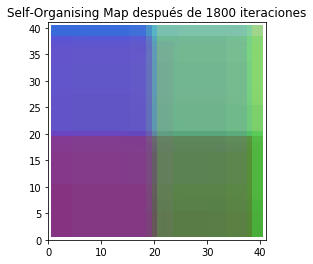

-----------------------------------------
Iteración Nº:  1900
LearningR =  0.026199999999999998
Vecindario =  18.466666666666665
Coord: [31  0]


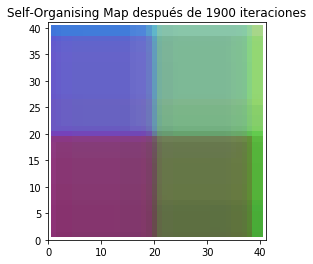

-----------------------------------------
Iteración Nº:  2000
LearningR =  0.026
Vecindario =  18.333333333333336
Coord: [ 0 19]


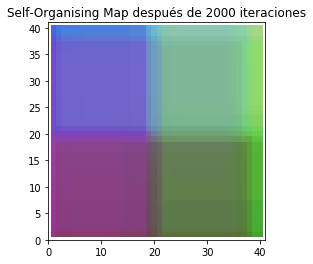

-----------------------------------------
Iteración Nº:  2100
LearningR =  0.0258
Vecindario =  18.2
Coord: [ 0 17]


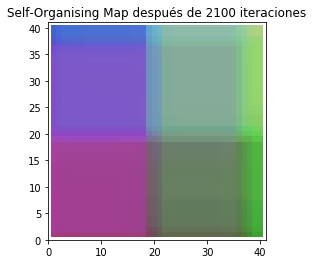

-----------------------------------------
Iteración Nº:  2200
LearningR =  0.025599999999999998
Vecindario =  18.066666666666666
Coord: [17 19]


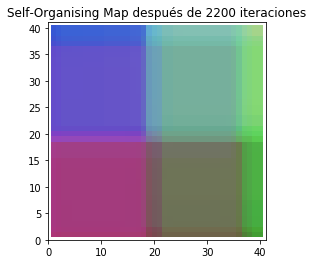

-----------------------------------------
Iteración Nº:  2300
LearningR =  0.0254
Vecindario =  17.933333333333334
Coord: [ 0 35]


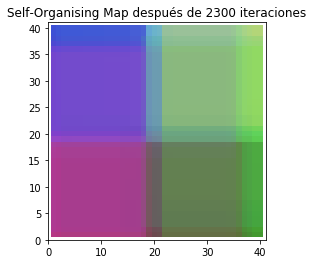

-----------------------------------------
Iteración Nº:  2400
LearningR =  0.0252
Vecindario =  17.8
Coord: [0 0]


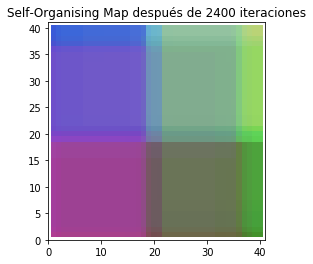

-----------------------------------------
Iteración Nº:  2500
LearningR =  0.024999999999999998
Vecindario =  17.666666666666668
Coord: [ 0 36]


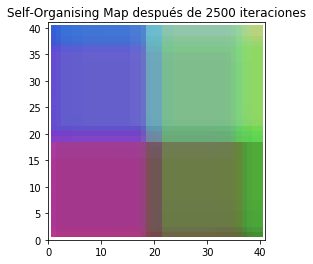

-----------------------------------------
Iteración Nº:  2600
LearningR =  0.0248
Vecindario =  17.53333333333333
Coord: [17 19]


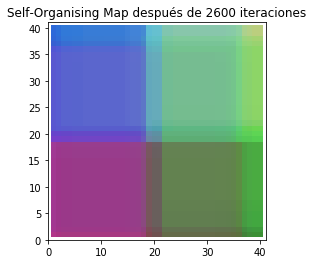

-----------------------------------------
Iteración Nº:  2700
LearningR =  0.0246
Vecindario =  17.400000000000002
Coord: [2 0]


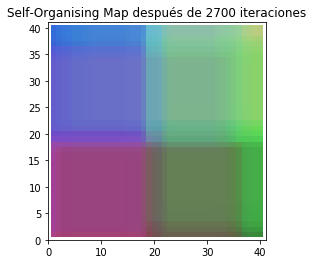

-----------------------------------------
Iteración Nº:  2800
LearningR =  0.024399999999999998
Vecindario =  17.266666666666666
Coord: [18 36]


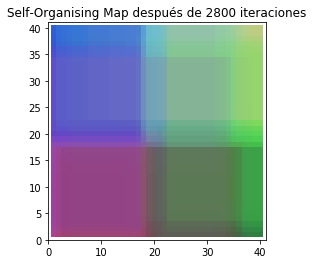

-----------------------------------------
Iteración Nº:  2900
LearningR =  0.0242
Vecindario =  17.133333333333333
Coord: [2 0]


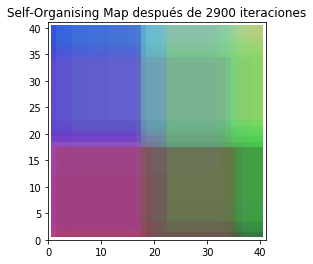

-----------------------------------------
Iteración Nº:  3000
LearningR =  0.024
Vecindario =  17.0
Coord: [16 17]


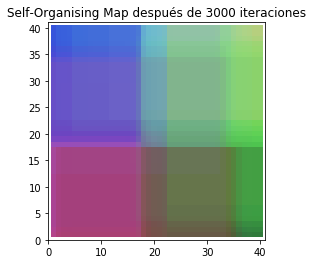

-----------------------------------------
Iteración Nº:  3100
LearningR =  0.023799999999999998
Vecindario =  16.866666666666667
Coord: [23 19]


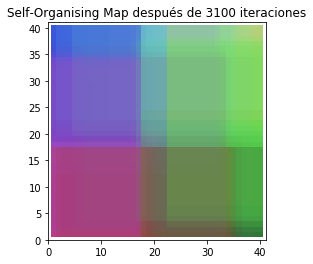

-----------------------------------------
Iteración Nº:  3200
LearningR =  0.0236
Vecindario =  16.733333333333334
Coord: [17 17]


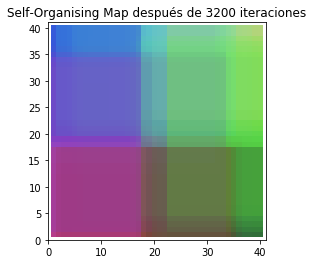

-----------------------------------------
Iteración Nº:  3300
LearningR =  0.023399999999999997
Vecindario =  16.6
Coord: [ 0 17]


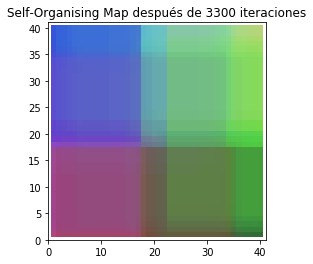

-----------------------------------------
Iteración Nº:  3400
LearningR =  0.0232
Vecindario =  16.46666666666667
Coord: [ 0 16]


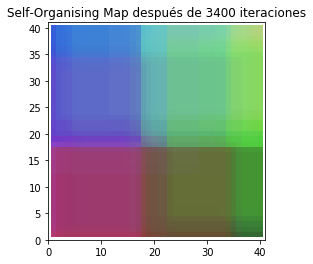

-----------------------------------------
Iteración Nº:  3500
LearningR =  0.023
Vecindario =  16.333333333333332
Coord: [29 18]


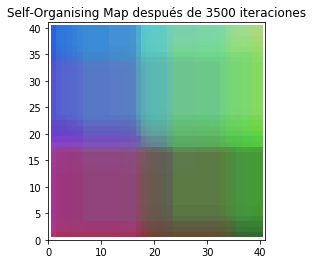

-----------------------------------------
Iteración Nº:  3600
LearningR =  0.0228
Vecindario =  16.2
Coord: [33  0]


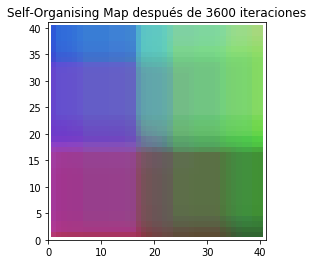

-----------------------------------------
Iteración Nº:  3700
LearningR =  0.0226
Vecindario =  16.066666666666666
Coord: [ 0 16]


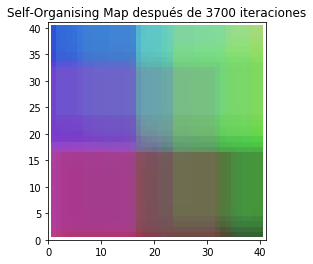

-----------------------------------------
Iteración Nº:  3800
LearningR =  0.0224
Vecindario =  15.933333333333332
Coord: [33  0]


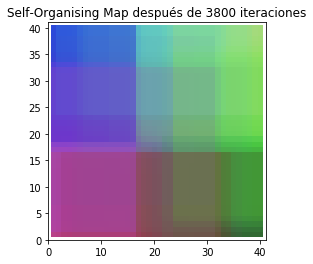

-----------------------------------------
Iteración Nº:  3900
LearningR =  0.022199999999999998
Vecindario =  15.8
Coord: [15 15]


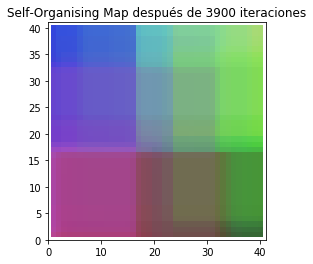

-----------------------------------------
Iteración Nº:  4000
LearningR =  0.022
Vecindario =  15.666666666666668
Coord: [20 16]


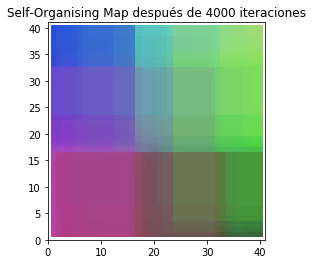

-----------------------------------------
Iteración Nº:  4100
LearningR =  0.0218
Vecindario =  15.533333333333333
Coord: [36  2]


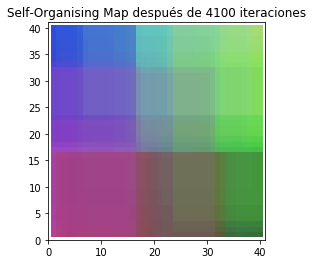

-----------------------------------------
Iteración Nº:  4200
LearningR =  0.0216
Vecindario =  15.399999999999999
Coord: [15 20]


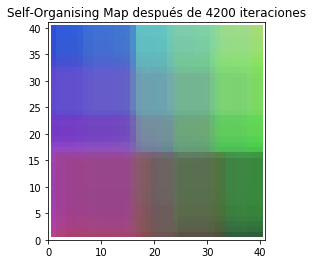

-----------------------------------------
Iteración Nº:  4300
LearningR =  0.0214
Vecindario =  15.266666666666667
Coord: [0 1]


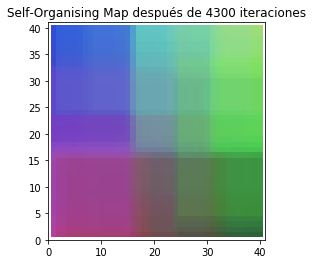

-----------------------------------------
Iteración Nº:  4400
LearningR =  0.0212
Vecindario =  15.133333333333333
Coord: [32  5]


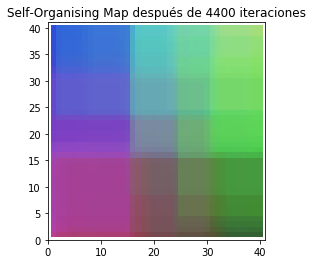

-----------------------------------------
Iteración Nº:  4500
LearningR =  0.020999999999999998
Vecindario =  15.0
Coord: [39 33]


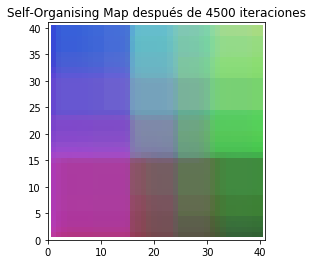

-----------------------------------------
Iteración Nº:  4600
LearningR =  0.0208
Vecindario =  14.866666666666667
Coord: [20 14]


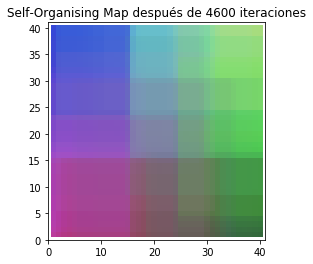

-----------------------------------------
Iteración Nº:  4700
LearningR =  0.0206
Vecindario =  14.733333333333333
Coord: [30  0]


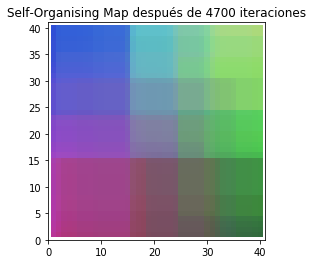

-----------------------------------------
Iteración Nº:  4800
LearningR =  0.0204
Vecindario =  14.599999999999998
Coord: [ 0 15]


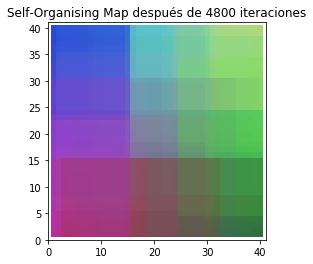

-----------------------------------------
Iteración Nº:  4900
LearningR =  0.0202
Vecindario =  14.466666666666667
Coord: [39 14]


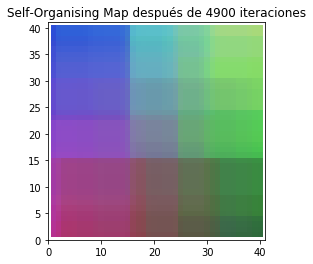

-----------------------------------------
Iteración Nº:  5000
LearningR =  0.019999999999999997
Vecindario =  14.333333333333336
Coord: [24  0]


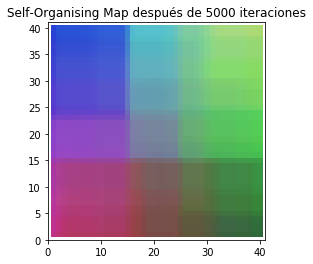

-----------------------------------------
Iteración Nº:  5100
LearningR =  0.019799999999999998
Vecindario =  14.2
Coord: [ 0 37]


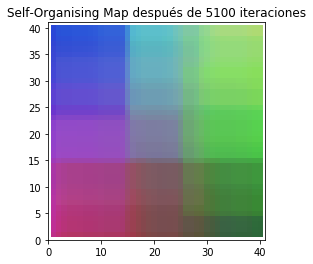

-----------------------------------------
Iteración Nº:  5200
LearningR =  0.0196
Vecindario =  14.066666666666666
Coord: [13 23]


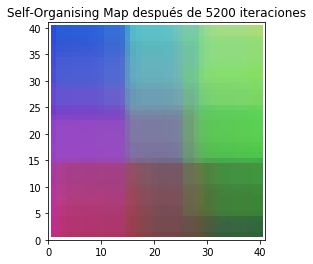

-----------------------------------------
Iteración Nº:  5300
LearningR =  0.0194
Vecindario =  13.933333333333334
Coord: [ 0 39]


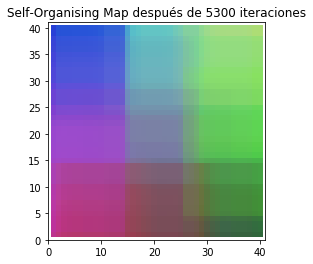

-----------------------------------------
Iteración Nº:  5400
LearningR =  0.019200000000000002
Vecindario =  13.8
Coord: [17 14]


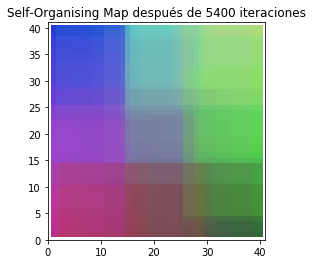

-----------------------------------------
Iteración Nº:  5500
LearningR =  0.019
Vecindario =  13.666666666666666
Coord: [15  0]


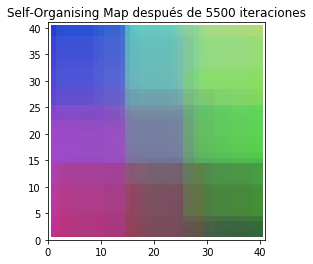

-----------------------------------------
Iteración Nº:  5600
LearningR =  0.018799999999999997
Vecindario =  13.533333333333335
Coord: [ 0 33]


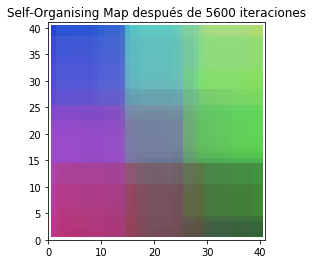

-----------------------------------------
Iteración Nº:  5700
LearningR =  0.0186
Vecindario =  13.4
Coord: [15 14]


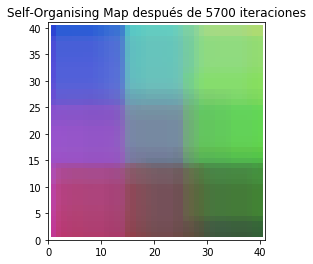

-----------------------------------------
Iteración Nº:  5800
LearningR =  0.0184
Vecindario =  13.266666666666666
Coord: [14  0]


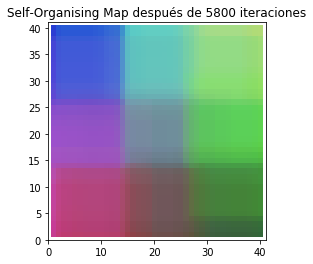

-----------------------------------------
Iteración Nº:  5900
LearningR =  0.0182
Vecindario =  13.133333333333333
Coord: [13  0]


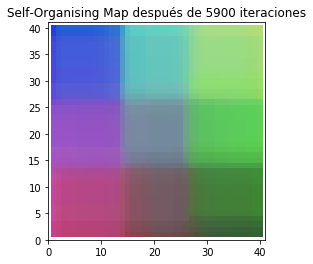

-----------------------------------------
Iteración Nº:  6000
LearningR =  0.018
Vecindario =  13.0
Coord: [25 14]


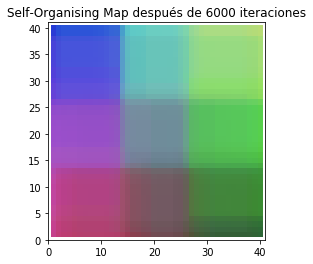

-----------------------------------------
Iteración Nº:  6100
LearningR =  0.0178
Vecindario =  12.866666666666665
Coord: [39 17]


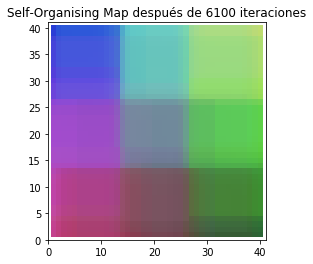

-----------------------------------------
Iteración Nº:  6200
LearningR =  0.017599999999999998
Vecindario =  12.733333333333334
Coord: [39 37]


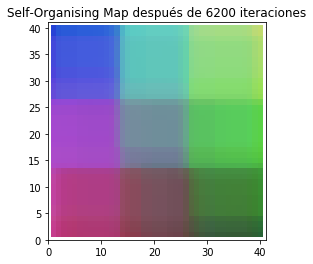

-----------------------------------------
Iteración Nº:  6300
LearningR =  0.0174
Vecindario =  12.600000000000001
Coord: [13  0]


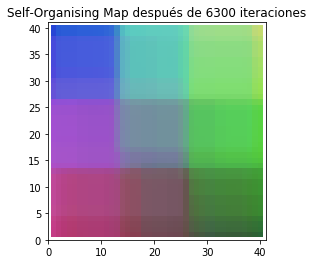

-----------------------------------------
Iteración Nº:  6400
LearningR =  0.0172
Vecindario =  12.466666666666665
Coord: [4 0]


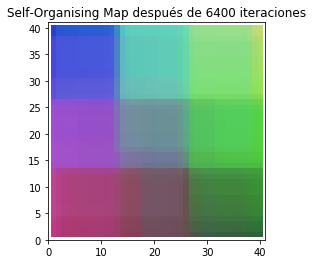

-----------------------------------------
Iteración Nº:  6500
LearningR =  0.017
Vecindario =  12.333333333333332
Coord: [ 0 39]


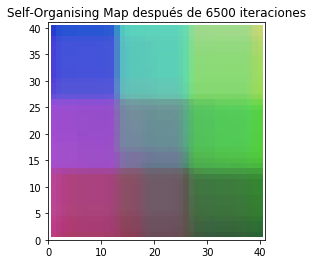

-----------------------------------------
Iteración Nº:  6600
LearningR =  0.0168
Vecindario =  12.200000000000001
Coord: [39 27]


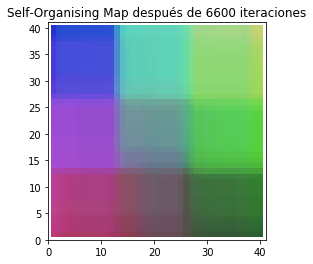

-----------------------------------------
Iteración Nº:  6700
LearningR =  0.0166
Vecindario =  12.066666666666666
Coord: [26 27]


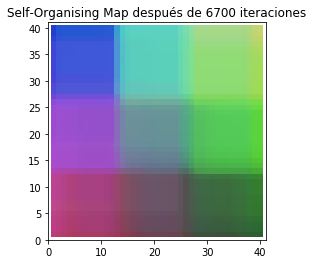

-----------------------------------------
Iteración Nº:  6800
LearningR =  0.016399999999999998
Vecindario =  11.933333333333334
Coord: [ 0 37]


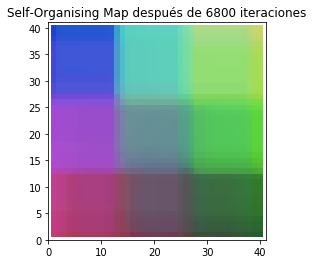

-----------------------------------------
Iteración Nº:  6900
LearningR =  0.0162
Vecindario =  11.8
Coord: [1 0]


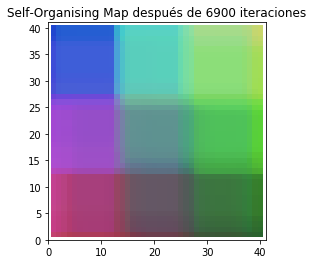

-----------------------------------------
Iteración Nº:  7000
LearningR =  0.016
Vecindario =  11.666666666666666
Coord: [13 12]


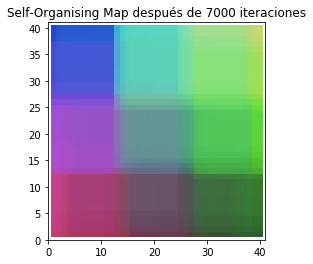

-----------------------------------------
Iteración Nº:  7100
LearningR =  0.0158
Vecindario =  11.533333333333331
Coord: [39 24]


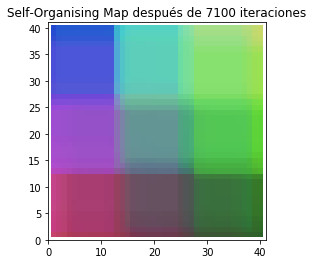

-----------------------------------------
Iteración Nº:  7200
LearningR =  0.0156
Vecindario =  11.4
Coord: [35 25]


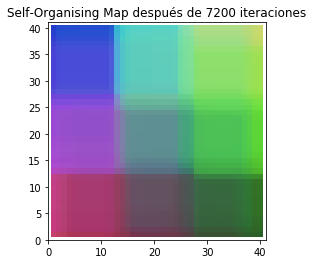

-----------------------------------------
Iteración Nº:  7300
LearningR =  0.015399999999999999
Vecindario =  11.266666666666666
Coord: [26  5]


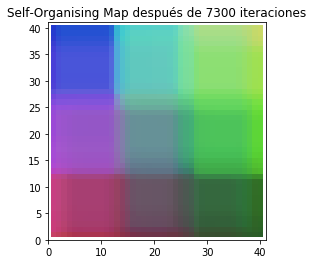

-----------------------------------------
Iteración Nº:  7400
LearningR =  0.0152
Vecindario =  11.133333333333333
Coord: [24  0]


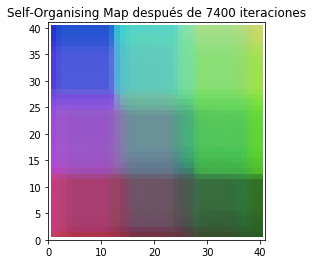

-----------------------------------------
Iteración Nº:  7500
LearningR =  0.015
Vecindario =  11.0
Coord: [ 0 26]


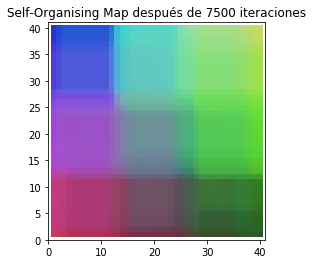

-----------------------------------------
Iteración Nº:  7600
LearningR =  0.014799999999999999
Vecindario =  10.866666666666665
Coord: [12 39]


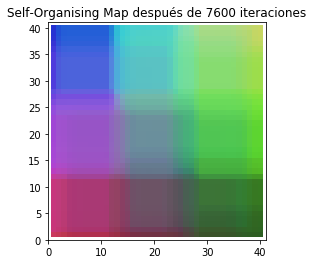

-----------------------------------------
Iteración Nº:  7700
LearningR =  0.0146
Vecindario =  10.733333333333334
Coord: [12 23]


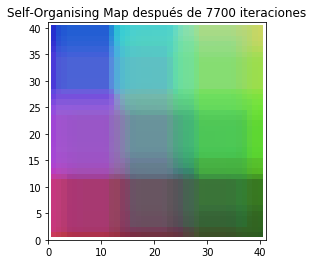

-----------------------------------------
Iteración Nº:  7800
LearningR =  0.0144
Vecindario =  10.6
Coord: [ 0 28]


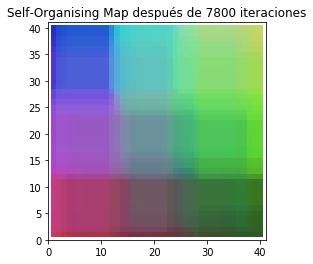

-----------------------------------------
Iteración Nº:  7900
LearningR =  0.0142
Vecindario =  10.466666666666669
Coord: [25 11]


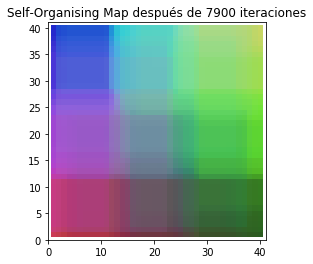

-----------------------------------------
Iteración Nº:  8000
LearningR =  0.013999999999999999
Vecindario =  10.333333333333334
Coord: [25 39]


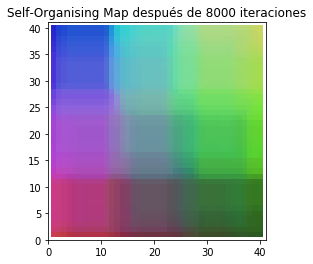

-----------------------------------------
Iteración Nº:  8100
LearningR =  0.0138
Vecindario =  10.2
Coord: [39 12]


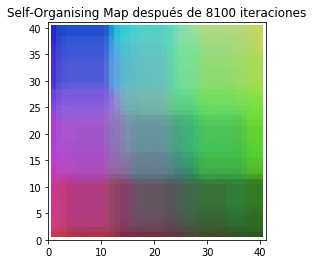

-----------------------------------------
Iteración Nº:  8200
LearningR =  0.013600000000000001
Vecindario =  10.066666666666666
Coord: [11 11]


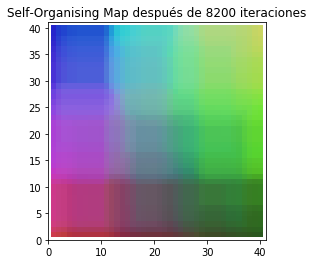

-----------------------------------------
Iteración Nº:  8300
LearningR =  0.013399999999999999
Vecindario =  9.933333333333334
Coord: [24 18]


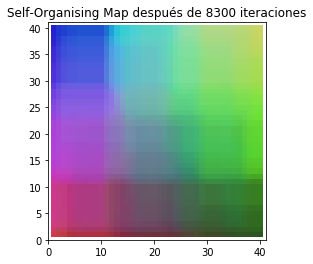

-----------------------------------------
Iteración Nº:  8400
LearningR =  0.0132
Vecindario =  9.799999999999999
Coord: [ 0 39]


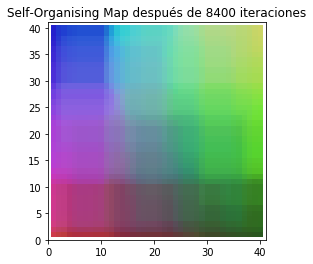

-----------------------------------------
Iteración Nº:  8500
LearningR =  0.013000000000000001
Vecindario =  9.666666666666668
Coord: [10 11]


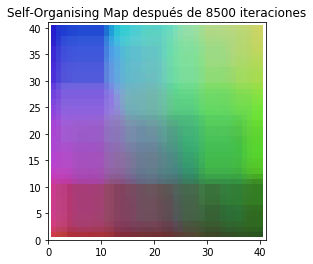

-----------------------------------------
Iteración Nº:  8600
LearningR =  0.012799999999999999
Vecindario =  9.533333333333333
Coord: [22 39]


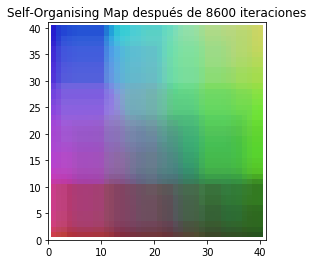

-----------------------------------------
Iteración Nº:  8700
LearningR =  0.0126
Vecindario =  9.4
Coord: [14 12]


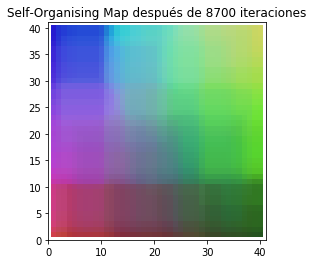

-----------------------------------------
Iteración Nº:  8800
LearningR =  0.012400000000000001
Vecindario =  9.266666666666666
Coord: [37 34]


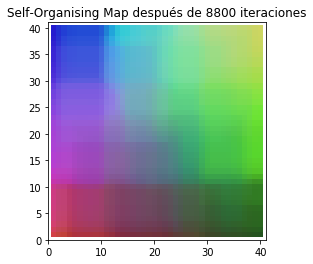

-----------------------------------------
Iteración Nº:  8900
LearningR =  0.012199999999999999
Vecindario =  9.133333333333333
Coord: [32 37]


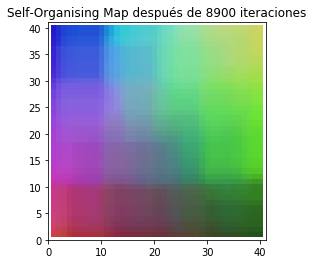

-----------------------------------------
Iteración Nº:  9000
LearningR =  0.012
Vecindario =  9.0
Coord: [39 11]


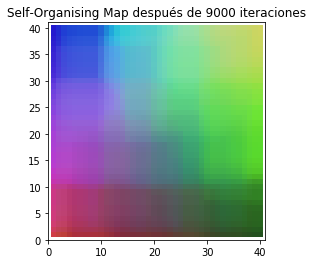

-----------------------------------------
Iteración Nº:  9100
LearningR =  0.011799999999999998
Vecindario =  8.866666666666667
Coord: [10  0]


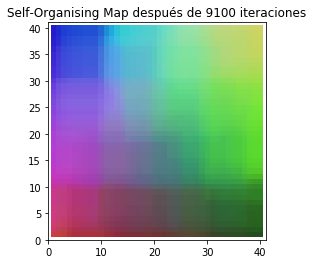

-----------------------------------------
Iteración Nº:  9200
LearningR =  0.0116
Vecindario =  8.733333333333334
Coord: [13  0]


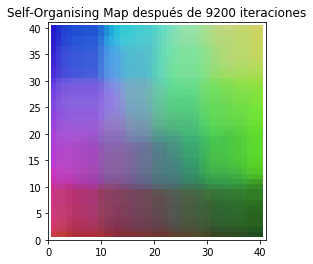

-----------------------------------------
Iteración Nº:  9300
LearningR =  0.0114
Vecindario =  8.6
Coord: [21  0]


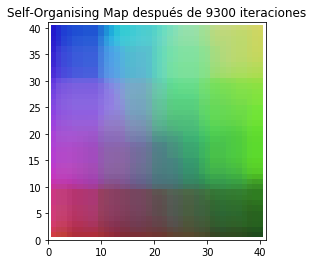

-----------------------------------------
Iteración Nº:  9400
LearningR =  0.011199999999999998
Vecindario =  8.466666666666665
Coord: [39 22]


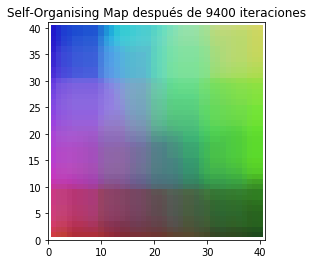

-----------------------------------------
Iteración Nº:  9500
LearningR =  0.011
Vecindario =  8.333333333333334
Coord: [21  0]


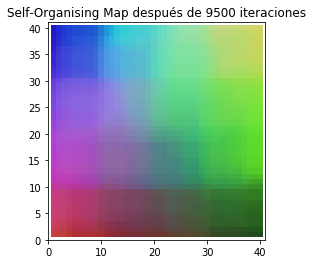

-----------------------------------------
Iteración Nº:  9600
LearningR =  0.0108
Vecindario =  8.2
Coord: [ 0 35]


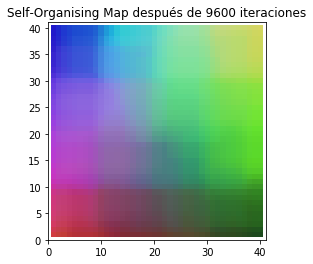

-----------------------------------------
Iteración Nº:  9700
LearningR =  0.010599999999999998
Vecindario =  8.066666666666668
Coord: [13 20]


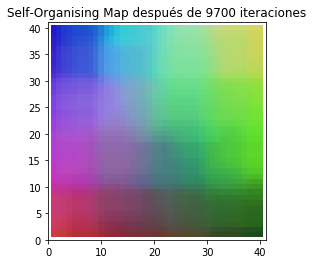

-----------------------------------------
Iteración Nº:  9800
LearningR =  0.0104
Vecindario =  7.933333333333334
Coord: [13  0]


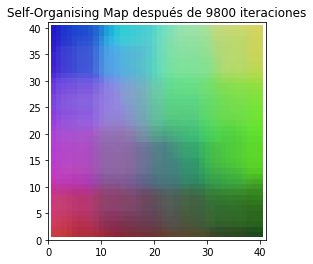

-----------------------------------------
Iteración Nº:  9900
LearningR =  0.0102
Vecindario =  7.799999999999999
Coord: [5 2]


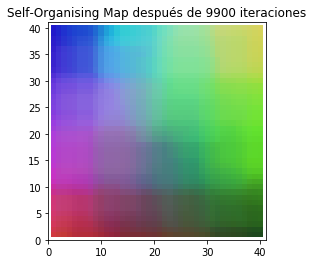

-----------------------------------------
Iteración Nº:  10000
LearningR =  0.009999999999999998
Vecindario =  7.666666666666668
Coord: [39 29]


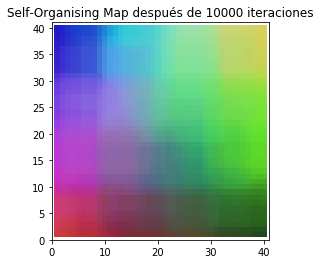

-----------------------------------------
Iteración Nº:  10100
LearningR =  0.0098
Vecindario =  7.533333333333333
Coord: [ 1 23]


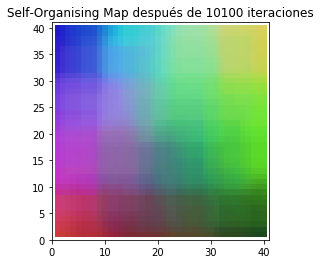

-----------------------------------------
Iteración Nº:  10200
LearningR =  0.009600000000000001
Vecindario =  7.399999999999999
Coord: [2 0]


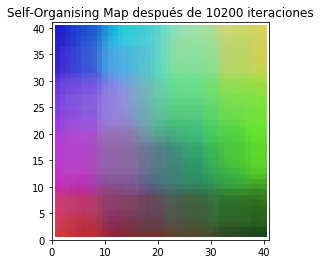

-----------------------------------------
Iteración Nº:  10300
LearningR =  0.009399999999999999
Vecindario =  7.2666666666666675
Coord: [ 0 34]


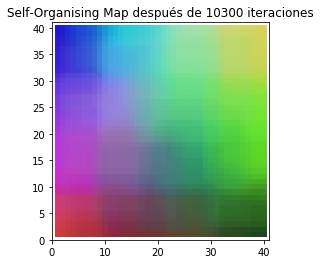

-----------------------------------------
Iteración Nº:  10400
LearningR =  0.0092
Vecindario =  7.133333333333333
Coord: [ 9 28]


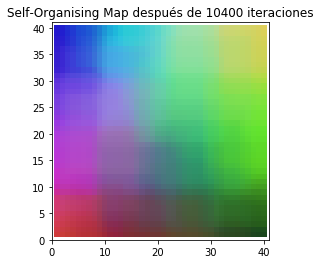

-----------------------------------------
Iteración Nº:  10500
LearningR =  0.009000000000000001
Vecindario =  7.000000000000001
Coord: [39 38]


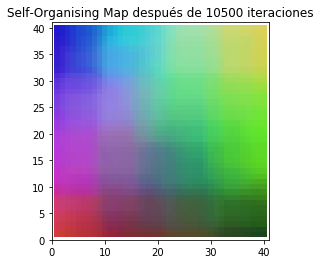

-----------------------------------------
Iteración Nº:  10600
LearningR =  0.008799999999999999
Vecindario =  6.866666666666667
Coord: [ 0 38]


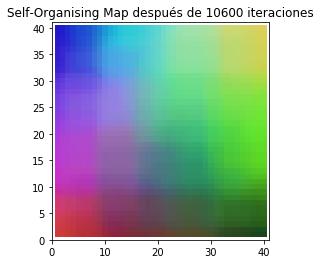

-----------------------------------------
Iteración Nº:  10700
LearningR =  0.0086
Vecindario =  6.7333333333333325
Coord: [16 10]


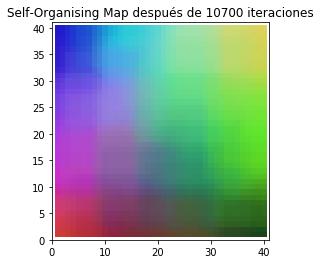

-----------------------------------------
Iteración Nº:  10800
LearningR =  0.008400000000000001
Vecindario =  6.6000000000000005
Coord: [37  0]


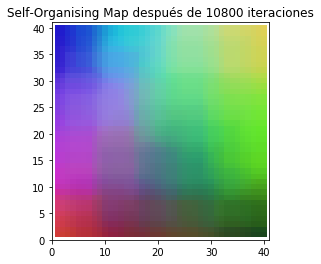

-----------------------------------------
Iteración Nº:  10900
LearningR =  0.008199999999999999
Vecindario =  6.466666666666667
Coord: [ 9 36]


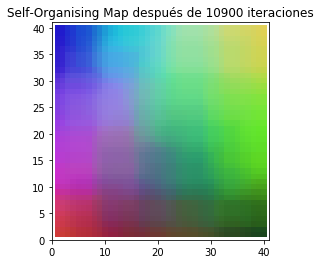

-----------------------------------------
Iteración Nº:  11000
LearningR =  0.008
Vecindario =  6.333333333333334
Coord: [38  9]


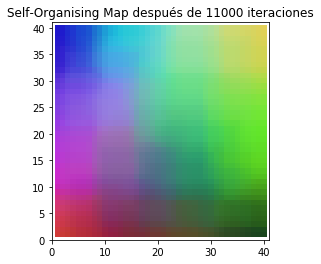

-----------------------------------------
Iteración Nº:  11100
LearningR =  0.007800000000000001
Vecindario =  6.2
Coord: [39  0]


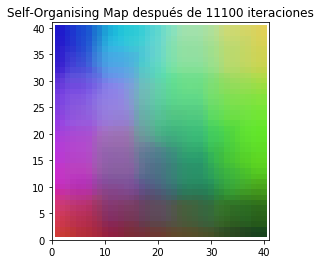

-----------------------------------------
Iteración Nº:  11200
LearningR =  0.007599999999999999
Vecindario =  6.066666666666666
Coord: [16 10]


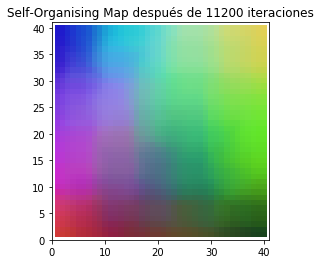

-----------------------------------------
Iteración Nº:  11300
LearningR =  0.0074
Vecindario =  5.933333333333334
Coord: [15 39]


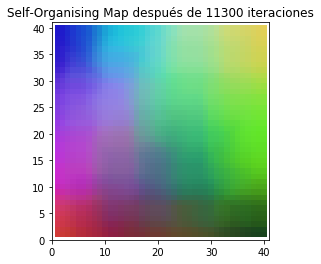

-----------------------------------------
Iteración Nº:  11400
LearningR =  0.0072000000000000015
Vecindario =  5.8
Coord: [ 0 32]


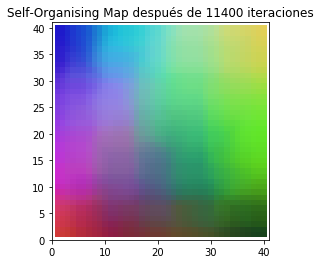

-----------------------------------------
Iteración Nº:  11500
LearningR =  0.006999999999999999
Vecindario =  5.666666666666666
Coord: [ 9 36]


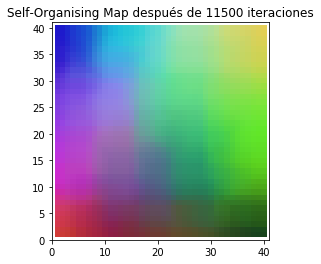

-----------------------------------------
Iteración Nº:  11600
LearningR =  0.0068000000000000005
Vecindario =  5.533333333333333
Coord: [30 39]


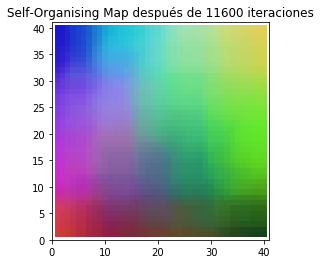

-----------------------------------------
Iteración Nº:  11700
LearningR =  0.006599999999999998
Vecindario =  5.3999999999999995
Coord: [ 3 39]


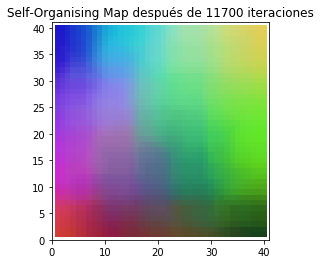

-----------------------------------------
Iteración Nº:  11800
LearningR =  0.0063999999999999994
Vecindario =  5.2666666666666675
Coord: [ 3 39]


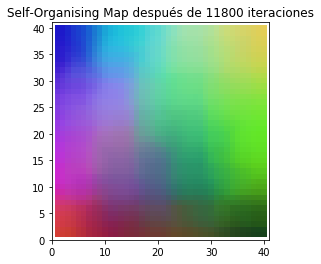

-----------------------------------------
Iteración Nº:  11900
LearningR =  0.006200000000000001
Vecindario =  5.133333333333333
Coord: [28 30]


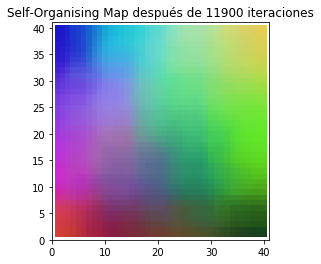

-----------------------------------------
Iteración Nº:  12000
LearningR =  0.005999999999999998
Vecindario =  4.999999999999999
Coord: [10 20]


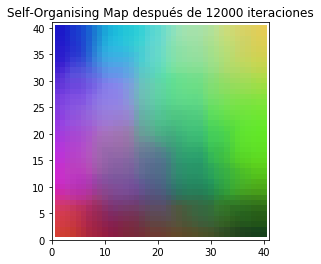

-----------------------------------------
Iteración Nº:  12100
LearningR =  0.0058
Vecindario =  4.866666666666667
Coord: [0 0]


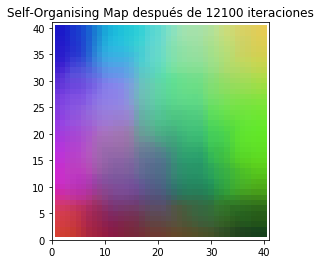

-----------------------------------------
Iteración Nº:  12200
LearningR =  0.005600000000000001
Vecindario =  4.7333333333333325
Coord: [9 0]


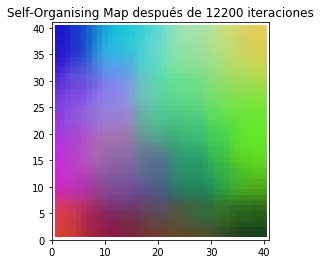

-----------------------------------------
Iteración Nº:  12300
LearningR =  0.0053999999999999986
Vecindario =  4.600000000000001
Coord: [30 23]


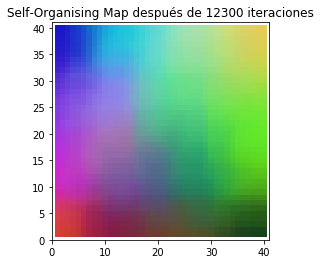

-----------------------------------------
Iteración Nº:  12400
LearningR =  0.0052
Vecindario =  4.466666666666667
Coord: [39 38]


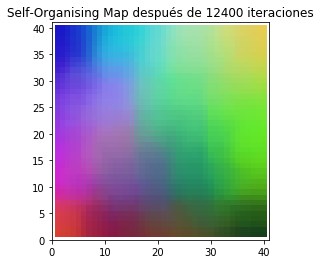

-----------------------------------------
Iteración Nº:  12500
LearningR =  0.005000000000000001
Vecindario =  4.333333333333332
Coord: [29 10]


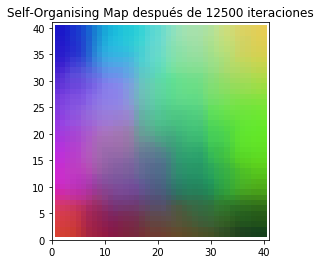

-----------------------------------------
Iteración Nº:  12600
LearningR =  0.004799999999999999
Vecindario =  4.200000000000001
Coord: [ 8 12]


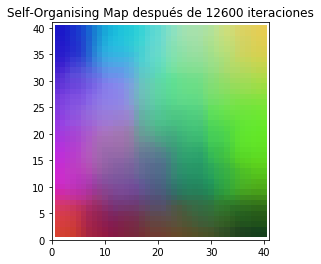

-----------------------------------------
Iteración Nº:  12700
LearningR =  0.0046
Vecindario =  4.066666666666666
Coord: [21 21]


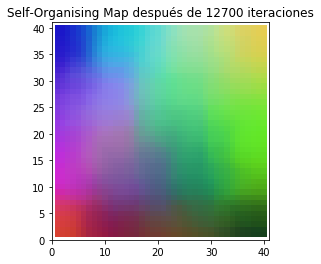

-----------------------------------------
Iteración Nº:  12800
LearningR =  0.004400000000000001
Vecindario =  3.9333333333333322
Coord: [20  0]


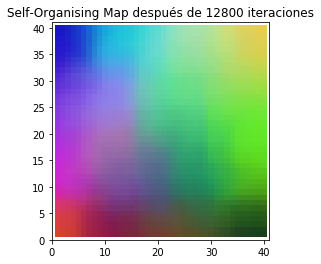

-----------------------------------------
Iteración Nº:  12900
LearningR =  0.004199999999999999
Vecindario =  3.8000000000000003
Coord: [16  0]


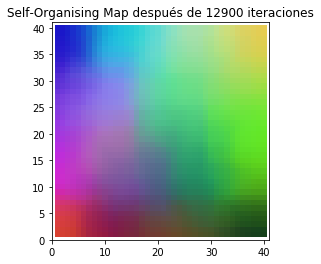

-----------------------------------------
Iteración Nº:  13000
LearningR =  0.004
Vecindario =  3.666666666666666
Coord: [20  0]


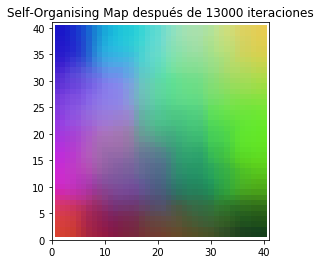

-----------------------------------------
Iteración Nº:  13100
LearningR =  0.0038000000000000013
Vecindario =  3.533333333333334
Coord: [ 0 18]


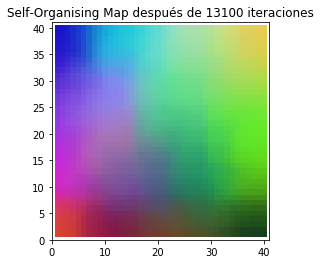

-----------------------------------------
Iteración Nº:  13200
LearningR =  0.003599999999999999
Vecindario =  3.4
Coord: [29  0]


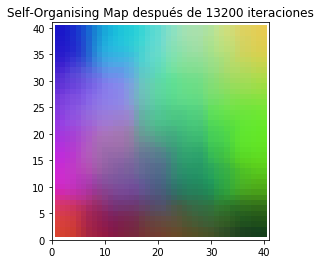

-----------------------------------------
Iteración Nº:  13300
LearningR =  0.0034000000000000002
Vecindario =  3.2666666666666657
Coord: [28 30]


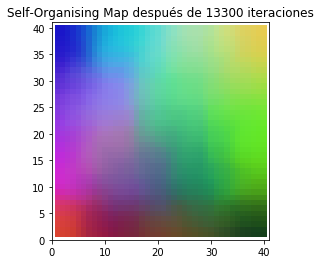

-----------------------------------------
Iteración Nº:  13400
LearningR =  0.0032000000000000015
Vecindario =  3.1333333333333337
Coord: [0 0]


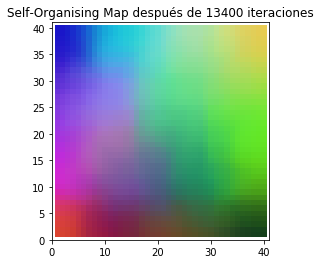

-----------------------------------------
Iteración Nº:  13500
LearningR =  0.002999999999999999
Vecindario =  2.9999999999999996
Coord: [6 1]


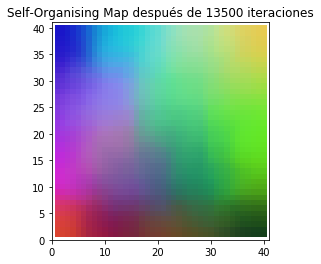

-----------------------------------------
Iteración Nº:  13600
LearningR =  0.0028000000000000004
Vecindario =  2.8666666666666676
Coord: [ 1 39]


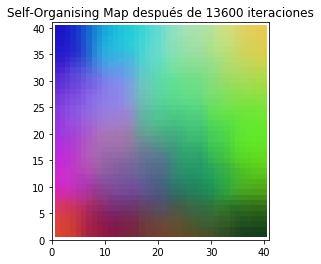

-----------------------------------------
Iteración Nº:  13700
LearningR =  0.0026000000000000016
Vecindario =  2.7333333333333334
Coord: [24 24]


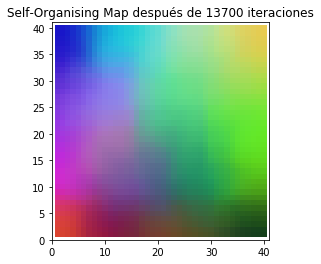

-----------------------------------------
Iteración Nº:  13800
LearningR =  0.0023999999999999994
Vecindario =  2.599999999999999
Coord: [37  3]


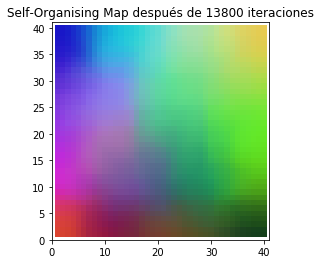

-----------------------------------------
Iteración Nº:  13900
LearningR =  0.0022000000000000006
Vecindario =  2.4666666666666672
Coord: [ 2 37]


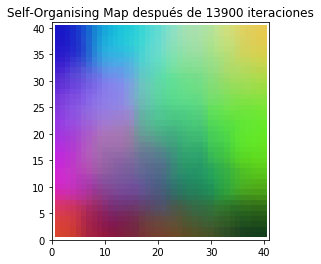

-----------------------------------------
Iteración Nº:  14000
LearningR =  0.0020000000000000018
Vecindario =  2.333333333333333
Coord: [8 9]


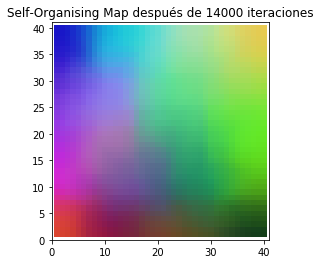

-----------------------------------------
Iteración Nº:  14100
LearningR =  0.0017999999999999995
Vecindario =  2.200000000000001
Coord: [ 4 38]


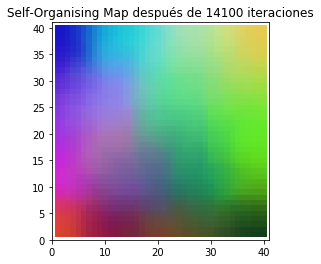

-----------------------------------------
Iteración Nº:  14200
LearningR =  0.0016000000000000007
Vecindario =  2.066666666666667
Coord: [39 15]


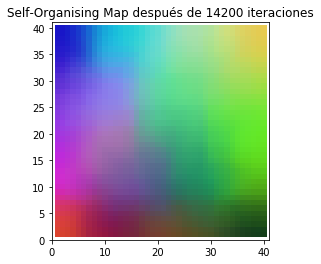

-----------------------------------------
Iteración Nº:  14300
LearningR =  0.0013999999999999985
Vecindario =  1.9333333333333327
Coord: [34 39]


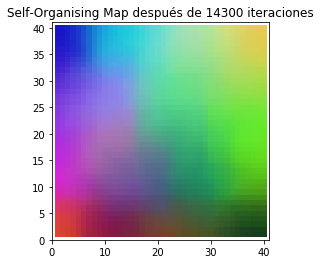

-----------------------------------------
Iteración Nº:  14400
LearningR =  0.0011999999999999997
Vecindario =  1.8000000000000007
Coord: [20 31]


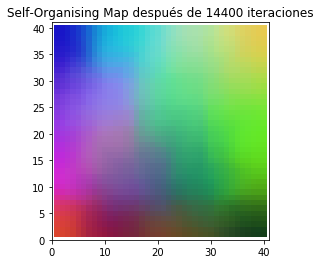

-----------------------------------------
Iteración Nº:  14500
LearningR =  0.0010000000000000009
Vecindario =  1.6666666666666665
Coord: [ 8 39]


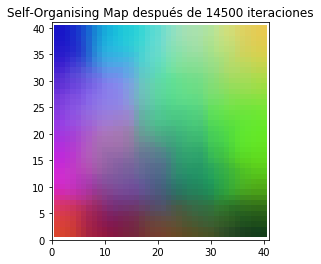

-----------------------------------------
Iteración Nº:  14600
LearningR =  0.0007999999999999986
Vecindario =  1.5333333333333323
Coord: [22 25]


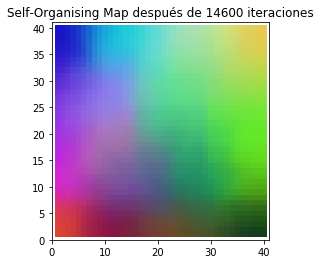

-----------------------------------------
Iteración Nº:  14700
LearningR =  0.0005999999999999998
Vecindario =  1.4000000000000004
Coord: [9 0]


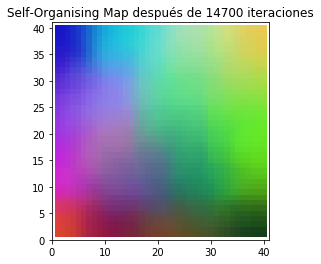

-----------------------------------------
Iteración Nº:  14800
LearningR =  0.00040000000000000105
Vecindario =  1.2666666666666662
Coord: [16 10]


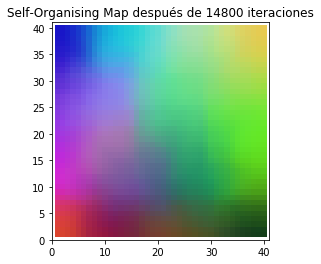

-----------------------------------------
Iteración Nº:  14900
LearningR =  0.0001999999999999988
Vecindario =  1.1333333333333342
Coord: [ 0 36]


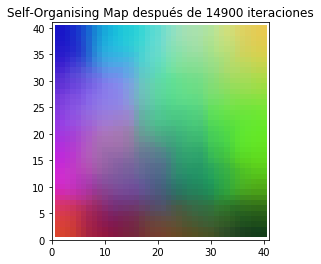

-----------------------------------------
Iteración Nº:  15000
LearningR =  0.0
Vecindario =  1.0
Coord: [22 25]


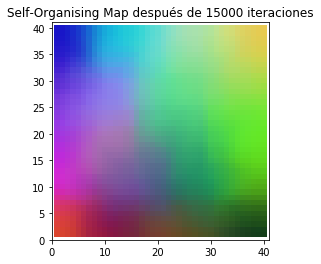

In [15]:
# Entrena la red con el dataset de entrenamiento

# Entrena la red con el dataset de entrenamiento
#Código de entrenamiento
CoordNGanadora = [0,0]    #Coordenadas de la neurona ganadora.
CoordNGanadora[0] = 1
CoordNGanadora[1] = 2

#ValAleatorio = datos[np.random.randint(0,datos.shape[0])]

for i in range(periodo+1):
    
    #if i%1000==0:
        #print("-----------------------------------------")
        #pintar_mapa(matriz_neuronas)
    
    #valAleatorio = np.random.randint(datos.shape[0])
 
    ValAleatorio = datos[np.random.randint(0,datos.shape[0])]
        
    ValAleatorio = np.reshape(ValAleatorio, (1,1,3))
                                            #datos[VAl]
    Variable,CoordNGanadora = calcular_bmu(ValAleatorio, matriz_neuronas, 3)#Cambiar el 3 por algo coherente
                                        #datos[VAL]
    #print(matriz_neuronas)  
    AjustarMatrizPesos_Carlos(CoordNGanadora, ValAleatorio, learning_rate, matriz_neuronas, vecindario)
   # print("EEEEE")
   # print(matriz_neuronas)
    learning_rate = variacion_learning_rate(learning_rate_Inicial, i, periodo)
    
    vecindario = variacion_vecindario(vecindarioInicial, i, periodo)    
    
    if i%100==0:
        print("-----------------------------------------")
        print("Iteración Nº: ",i)
        print("LearningR = ",learning_rate)
        print("Vecindario = ", vecindario)
        print("Coord:",CoordNGanadora)
        pintar_mapa(matriz_neuronas, i)
    


    

## SOM Clasificación

In [16]:
# Clasifica los patrones de entrenamiento con la matriz de pesos recién entrenada

# Clasifica los patrones de entrenamiento con la matriz de pesos recién entrenada
def ClasPatron(muestra, matriz_pesos, mapa_activacion, mapa_clasificacion, mapa_distancias):
    #Variables necesarias para la clasificación
    dist = 99
    CompIClas = 0
    CompJClas = 0
    bmuClas = [0, 0, 0]
    distaux = 0
    bmuClasidx = [0, 0]
    
    #Calculamos la bmu con respecto al patrón a clasificar
    for i in range (matriz_pesos.shape[0]):
        for j in range (matriz_pesos.shape[0]): #Bucles para recorres las dimensiones 10*10 de la matriz(o n*n)
            distaux = 0
            for k in range (len(datos[0])):#Para recorrer los 3 componentes de cada neurona
                distaux = distaux + (matriz_pesos[i, j, k] - muestra[k])**2  #Cálculo de la distancia
            if dist>distaux: #Vamos guardando progresivamente la distancia más pequeña y las coordenadas  de la neurona que es
                dist = distaux
                CompIClas = i
                CompJClas = j

    bmuClas = matriz_pesos[CompIClas, CompJClas]

    #Guardamos la matriz del mapa de activación y clasificación adecuadamente.             
    mapa_activacion[CompIClas, CompJClas] = mapa_activacion[CompIClas, CompJClas] + 1 #Guardamos resultado
    mapa_clasificacion[CompIClas, CompJClas] = matriz_pesos[CompIClas, CompJClas] #Guardamos último color de la neurona
    
    bmuClasidx = [CompIClas, CompJClas]
    
    #Calculamos el mapa de distancias. (distancia media entre los datos y la neurona ganadora).
    mapa_distancias[CompIClas][CompJClas] = ((mapa_distancias[CompIClas][CompJClas]*(mapa_activacion[CompIClas][CompJClas]-1)) + np.sqrt(dist))/mapa_activacion[CompIClas][CompJClas]
    print(mapa_distancias[CompIClas][CompJClas])
    
    return mapa_clasificacion, mapa_activacion, mapa_distancias, bmuClasidx
                    

## SOM Prueba

[255 255 255]
[1. 1. 1.]
0.47702891134024694
[ 26 , 39 ]
[ 25 , 39 ]
El flgVecinas =  0
[255   0   0]
[1. 0. 0.]
0.3527041952935956
[ 0 , 1 ]
[ 0 , 0 ]
El flgVecinas =  0
[  0 255   0]
[0. 1. 0.]
0.4070707431748803
[ 35 , 15 ]
[ 34 , 15 ]
El flgVecinas =  0
[  0   0 255]
[0. 0. 1.]
0.24469477678578155
[ 1 , 39 ]
[ 0 , 39 ]
El flgVecinas =  0
[255 255   0]
[1. 1. 0.]
0.3841709753190966
[ 39 , 38 ]
[ 39 , 35 ]
El flgVecinas =  1
[255   0 255]
[1. 0. 1.]
0.287705015155564
[ 0 , 13 ]
[ 0 , 12 ]
El flgVecinas =  0
[  0 255 255]
[0. 1. 1.]
0.289310776715578
[ 13 , 39 ]
[ 13 , 38 ]
El flgVecinas =  0
[0 0 0]
[0. 0. 0.]
0.27382547553923514
[ 39 , 1 ]
[ 39 , 0 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0. 0. 0.]
Coordenadas de la neurona ganadora para la muestra
[39, 0]
Mapa de Activación:
[[1. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
Mapa de Clasificación:

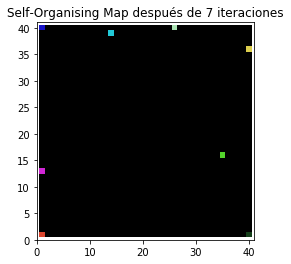

Mapa de Distancias:
[[0.3527042  0.         0.         ... 0.         0.         0.24469478]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.27382548 0.         0.         ... 0.         0.         0.        ]]
El número de clases generadas es de:  8 .
El error de cuantificación del mapa de kohonen es de una distancia de:  0.33956385866549726
El error topológico es de:  0.125


In [27]:
# Clasifica nuevos patrones generados al azar.

#Reiniciamos las variables para CLASIFICACION
mapa_clasificacion = np.zeros((lado_mapa,lado_mapa,len(datos[0])))
mapa_activacion = np.zeros((lado_mapa,lado_mapa))
mapa_distancias = np.zeros((lado_mapa,lado_mapa))

muestra_prueba = np.array([[255, 255, 255], [255, 0, 0], [0, 255, 0], [0, 0, 255], [255, 255, 0], [255, 0, 255], [0, 255, 255], [0, 0, 0]]);

#Variables internas
error_topologico = 0
longitud = muestra_prueba.shape[0]
contador = 0

for i in range (longitud):
    #Creamos un vector de 3 componentes que representa un dato a clasificar. Lo realizamos 5 veces 
   # muestra = np.random.randint(0,256,(3))
    muestra = muestra_prueba[i]
    print(muestra)
    if normalizar_datos:
        muestra = (muestra - min_datos) / (max_datos - min_datos)
    print(muestra)
    #Clasificamos patrón
    mapa_clasificacion,mapa_activacion,mapa_distancias,bmuClasidx = ClasPatron(muestra, matriz_pesos, mapa_activacion, mapa_clasificacion, mapa_distancias)
    
    #Calculamos el error Topológico (Debe conocer el vector de entrada siempre) y lo vamos calculando progresivamente.
    error_topologico += Error_Topologico(matriz_pesos, muestra)
    if i==longitud-1:
        error_topologico = error_topologico/longitud

#Muestra de los datos
print("-----------------------------------------")
print("Muestra:")
print(muestra)
print("Coordenadas de la neurona ganadora para la muestra")
print(bmuClasidx)
print("Mapa de Activación:")
print(mapa_activacion)
print("Mapa de Clasificación:")
pintar_mapa(mapa_clasificacion, i)
print("Mapa de Distancias:")
print(mapa_distancias)

for i in range (mapa_activacion.shape[0]):
        for j in range (mapa_activacion.shape[1]): 
            if mapa_activacion[i][j] != 0:
                contador+=1
print("El número de clases generadas es de: ",contador,".")

ImprimirErrores()

## SOM Prueba2

[0.64313725 0.94509804 0.61568627]
0.06940738700549472
[ 28 , 37 ]
[ 28 , 38 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.64313725 0.94509804 0.61568627]
Coordenadas de la neurona ganadora para la muestra
[28, 38]
Mapa de Activación:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 0
Mapa de Clasificación:


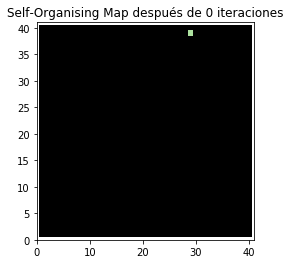

Mapa de Distancias:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 0
[0.29803922 0.10196078 0.78823529]
0.049660430035642446
[ 1 , 31 ]
[ 0 , 31 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.29803922 0.10196078 0.78823529]
Coordenadas de la neurona ganadora para la muestra
[0, 31]
Mapa de Activación:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 1
Mapa de Clasificación:


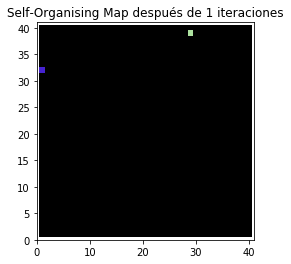

Mapa de Distancias:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 1
[0.36078431 0.21960784 0.78823529]
0.049436811561977385
[ 2 , 30 ]
[ 1 , 29 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.36078431 0.21960784 0.78823529]
Coordenadas de la neurona ganadora para la muestra
[1, 29]
Mapa de Activación:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 2
Mapa de Clasificación:


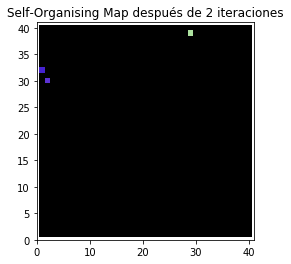

Mapa de Distancias:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 2
[0.6745098  0.10196078 0.2745098 ]
0.04564273093709097
[ 7 , 0 ]
[ 6 , 2 ]
El flgVecinas =  1
-----------------------------------------
Muestra:
[0.6745098  0.10196078 0.2745098 ]
Coordenadas de la neurona ganadora para la muestra
[6, 2]
Mapa de Activación:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 3
Mapa de Clasificación:


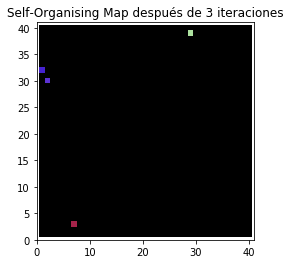

Mapa de Distancias:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 3
[0.88235294 0.24705882 0.02352941]
0.16016360597584664
[ 1 , 0 ]
[ 0 , 0 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.88235294 0.24705882 0.02352941]
Coordenadas de la neurona ganadora para la muestra
[0, 0]
Mapa de Activación:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 4
Mapa de Clasificación:


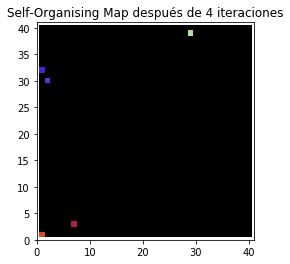

Mapa de Distancias:
[[0.16016361 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 4
[0.53333333 0.23921569 0.59607843]
0.04273799168732596
[ 9 , 8 ]
[ 8 , 9 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.53333333 0.23921569 0.59607843]
Coordenadas de la neurona ganadora para la muestra
[8, 9]
Mapa de Activación:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 5
Mapa de Clasificación:


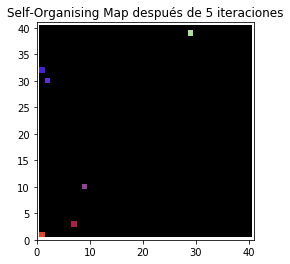

Mapa de Distancias:
[[0.16016361 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 5
[0.71764706 0.0745098  0.34901961]
0.09995767731290554
[ 6 , 3 ]
[ 6 , 4 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.71764706 0.0745098  0.34901961]
Coordenadas de la neurona ganadora para la muestra
[6, 4]
Mapa de Activación:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 6
Mapa de Clasificación:


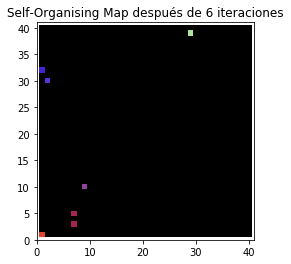

Mapa de Distancias:
[[0.16016361 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 6
[0.37647059 0.29019608 0.0627451 ]
0.08830587444651723
[ 25 , 0 ]
[ 24 , 0 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.37647059 0.29019608 0.0627451 ]
Coordenadas de la neurona ganadora para la muestra
[24, 0]
Mapa de Activación:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 7
Mapa de Clasificación:


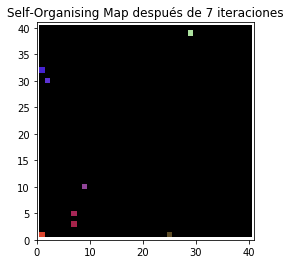

Mapa de Distancias:
[[0.16016361 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 7
[0.14509804 0.4        0.43529412]
0.065983705248787
[ 22 , 9 ]
[ 22 , 8 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.14509804 0.4        0.43529412]
Coordenadas de la neurona ganadora para la muestra
[22, 8]
Mapa de Activación:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 8
Mapa de Clasificación:


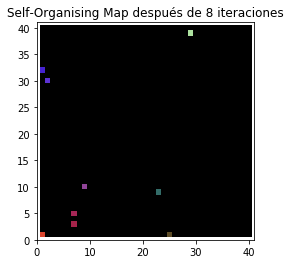

Mapa de Distancias:
[[0.16016361 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 8
[0.0745098  0.21568627 0.70196078]
0.10124858214775884
[ 4 , 39 ]
[ 4 , 38 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.0745098  0.21568627 0.70196078]
Coordenadas de la neurona ganadora para la muestra
[4, 38]
Mapa de Activación:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 9
Mapa de Clasificación:


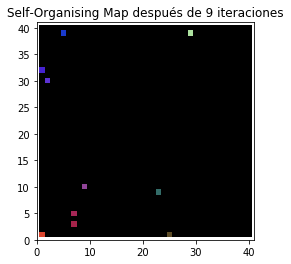

Mapa de Distancias:
[[0.16016361 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 9
[0.11764706 0.00392157 0.8745098 ]
0.11699907094835917
[ 0 , 37 ]
[ 0 , 39 ]
El flgVecinas =  1
-----------------------------------------
Muestra:
[0.11764706 0.00392157 0.8745098 ]
Coordenadas de la neurona ganadora para la muestra
[0, 39]
Mapa de Activación:
[[1. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 10
Mapa de Clasificación:


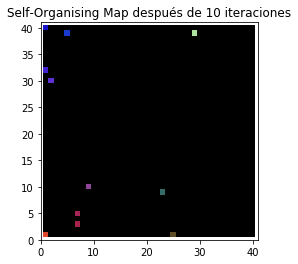

Mapa de Distancias:
[[0.16016361 0.         0.         ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 10
[0.30588235 0.7372549  0.15294118]
0.009978512453941287
[ 35 , 12 ]
[ 35 , 11 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.30588235 0.7372549  0.15294118]
Coordenadas de la neurona ganadora para la muestra
[35, 11]
Mapa de Activación:
[[1. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 11
Mapa de Clasificación:


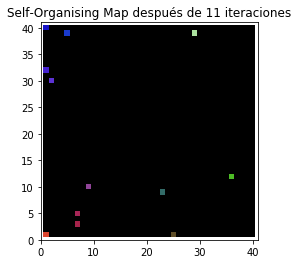

Mapa de Distancias:
[[0.16016361 0.         0.         ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 11
[0.38039216 0.90196078 0.36078431]
0.029440687064511313
[ 30 , 23 ]
[ 29 , 24 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.38039216 0.90196078 0.36078431]
Coordenadas de la neurona ganadora para la muestra
[29, 24]
Mapa de Activación:
[[1. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 12
Mapa de Clasificación:


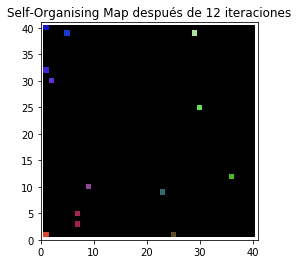

Mapa de Distancias:
[[0.16016361 0.         0.         ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 12
[0.41960784 0.8627451  0.57254902]
0.015719361136334934
[ 23 , 30 ]
[ 23 , 29 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.41960784 0.8627451  0.57254902]
Coordenadas de la neurona ganadora para la muestra
[23, 29]
Mapa de Activación:
[[1. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 13
Mapa de Clasificación:


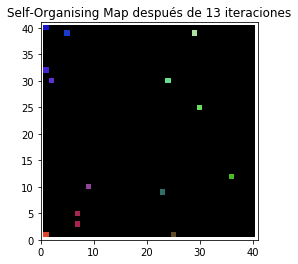

Mapa de Distancias:
[[0.16016361 0.         0.         ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 13
[0.03529412 0.62745098 0.41960784]
0.11416093366455532
[ 29 , 10 ]
[ 28 , 10 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.03529412 0.62745098 0.41960784]
Coordenadas de la neurona ganadora para la muestra
[28, 10]
Mapa de Activación:
[[1. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 14
Mapa de Clasificación:


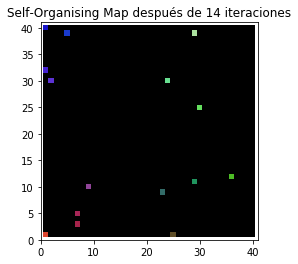

Mapa de Distancias:
[[0.16016361 0.         0.         ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 14
[0.25490196 0.74509804 0.54901961]
0.03528366712449286
[ 22 , 21 ]
[ 21 , 21 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.25490196 0.74509804 0.54901961]
Coordenadas de la neurona ganadora para la muestra
[21, 21]
Mapa de Activación:
[[1. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 15
Mapa de Clasificación:


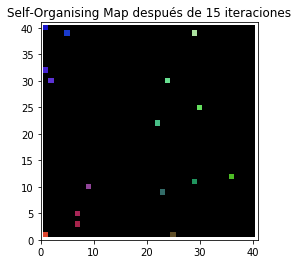

Mapa de Distancias:
[[0.16016361 0.         0.         ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 15
[0.02352941 0.8        0.8745098 ]
0.09322132590138908
[ 12 , 39 ]
[ 11 , 39 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.02352941 0.8        0.8745098 ]
Coordenadas de la neurona ganadora para la muestra
[11, 39]
Mapa de Activación:
[[1. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 16
Mapa de Clasificación:


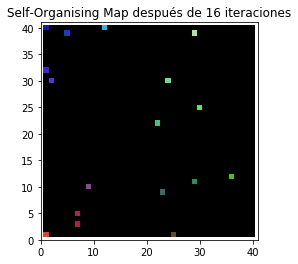

Mapa de Distancias:
[[0.16016361 0.         0.         ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 16
[0.57647059 0.2745098  0.19215686]
0.12400609410885426
[ 20 , 0 ]
[ 19 , 0 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.57647059 0.2745098  0.19215686]
Coordenadas de la neurona ganadora para la muestra
[19, 0]
Mapa de Activación:
[[1. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 17
Mapa de Clasificación:


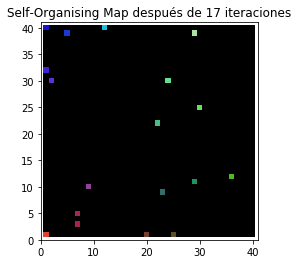

Mapa de Distancias:
[[0.16016361 0.         0.         ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 17
[0.40392157 0.90196078 0.68627451]
0.03500887752692738
[ 21 , 32 ]
[ 20 , 31 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.40392157 0.90196078 0.68627451]
Coordenadas de la neurona ganadora para la muestra
[20, 31]
Mapa de Activación:
[[1. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 18
Mapa de Clasificación:


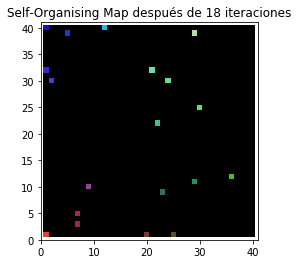

Mapa de Distancias:
[[0.16016361 0.         0.         ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 18
[0.51372549 0.41176471 0.97254902]
0.0646692979363136
[ 7 , 27 ]
[ 6 , 26 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.51372549 0.41176471 0.97254902]
Coordenadas de la neurona ganadora para la muestra
[6, 26]
Mapa de Activación:
[[1. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 19
Mapa de Clasificación:


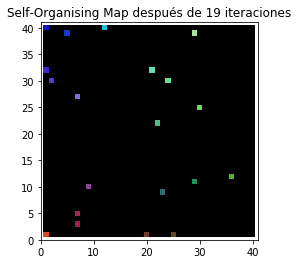

Mapa de Distancias:
[[0.16016361 0.         0.         ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 19
[0.95686275 0.31764706 0.25490196]
0.11285102477410655
[ 0 , 3 ]
[ 0 , 2 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.95686275 0.31764706 0.25490196]
Coordenadas de la neurona ganadora para la muestra
[0, 2]
Mapa de Activación:
[[1. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 20
Mapa de Clasificación:


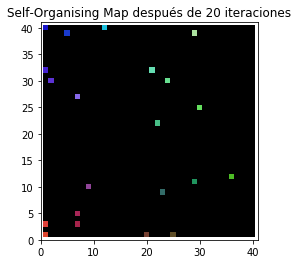

Mapa de Distancias:
[[0.16016361 0.         0.11285102 ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 20
[0.23921569 0.65882353 0.51372549]
0.027658961727539667
[ 22 , 19 ]
[ 22 , 18 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.23921569 0.65882353 0.51372549]
Coordenadas de la neurona ganadora para la muestra
[22, 18]
Mapa de Activación:
[[1. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 21
Mapa de Clasificación:


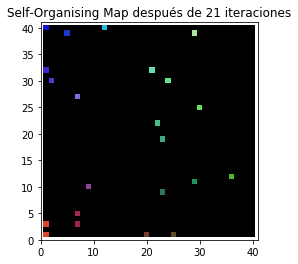

Mapa de Distancias:
[[0.16016361 0.         0.11285102 ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 21
[0.63137255 0.90588235 0.32156863]
0.04406953161153973
[ 37 , 28 ]
[ 36 , 28 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.63137255 0.90588235 0.32156863]
Coordenadas de la neurona ganadora para la muestra
[36, 28]
Mapa de Activación:
[[1. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 22
Mapa de Clasificación:


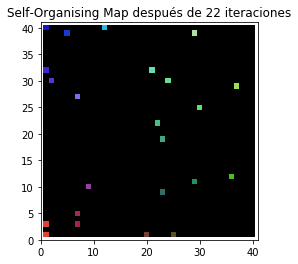

Mapa de Distancias:
[[0.16016361 0.         0.11285102 ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 22
[0.11372549 0.1372549  0.73333333]
0.05874414489624191
[ 2 , 38 ]
[ 2 , 37 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.11372549 0.1372549  0.73333333]
Coordenadas de la neurona ganadora para la muestra
[2, 37]
Mapa de Activación:
[[1. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 23
Mapa de Clasificación:


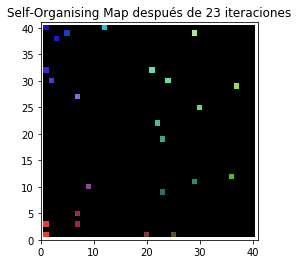

Mapa de Distancias:
[[0.16016361 0.         0.11285102 ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 23
[0.42745098 0.50980392 0.51372549]
0.06995064366198979
[ 18 , 16 ]
[ 17 , 16 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.42745098 0.50980392 0.51372549]
Coordenadas de la neurona ganadora para la muestra
[17, 16]
Mapa de Activación:
[[1. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 24
Mapa de Clasificación:


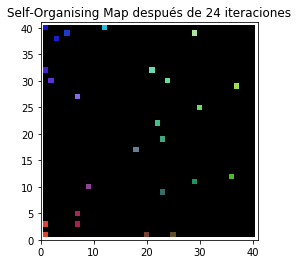

Mapa de Distancias:
[[0.16016361 0.         0.11285102 ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 24
[0.1372549  0.32941176 0.11372549]
0.011854275932308294
[ 38 , 3 ]
[ 37 , 3 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.1372549  0.32941176 0.11372549]
Coordenadas de la neurona ganadora para la muestra
[37, 3]
Mapa de Activación:
[[1. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 25
Mapa de Clasificación:


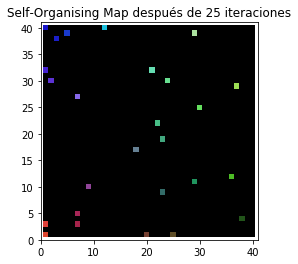

Mapa de Distancias:
[[0.16016361 0.         0.11285102 ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 25
[0.29411765 0.68627451 0.39215686]
0.07726267739425403
[ 28 , 18 ]
[ 28 , 17 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.29411765 0.68627451 0.39215686]
Coordenadas de la neurona ganadora para la muestra
[28, 17]
Mapa de Activación:
[[1. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 26
Mapa de Clasificación:


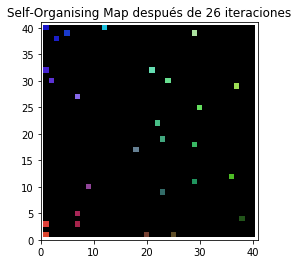

Mapa de Distancias:
[[0.16016361 0.         0.11285102 ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 26
[0.94901961 0.32941176 0.78039216]
0.20761409481905288
[ 2 , 10 ]
[ 1 , 10 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.94901961 0.32941176 0.78039216]
Coordenadas de la neurona ganadora para la muestra
[1, 10]
Mapa de Activación:
[[1. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 27
Mapa de Clasificación:


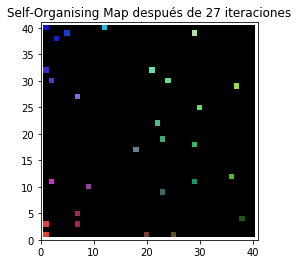

Mapa de Distancias:
[[0.16016361 0.         0.11285102 ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 27
[0.0745098  0.64705882 0.26666667]
0.09163233374307721
[ 30 , 10 ]
[ 30 , 9 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.0745098  0.64705882 0.26666667]
Coordenadas de la neurona ganadora para la muestra
[30, 9]
Mapa de Activación:
[[1. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 28
Mapa de Clasificación:


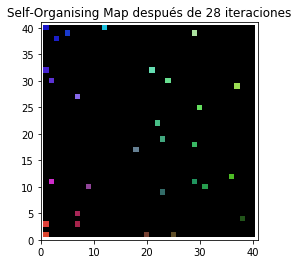

Mapa de Distancias:
[[0.16016361 0.         0.11285102 ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 28
[0.25098039 0.36862745 0.28627451]
0.01763633912986498
[ 25 , 5 ]
[ 24 , 5 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.25098039 0.36862745 0.28627451]
Coordenadas de la neurona ganadora para la muestra
[24, 5]
Mapa de Activación:
[[1. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 29
Mapa de Clasificación:


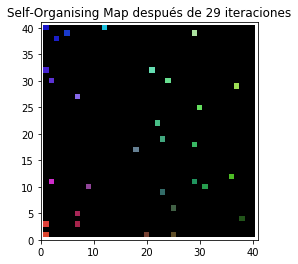

Mapa de Distancias:
[[0.16016361 0.         0.11285102 ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 29
[0.28627451 0.92156863 0.21568627]
0.07431759107807939
[ 33 , 19 ]
[ 33 , 18 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.28627451 0.92156863 0.21568627]
Coordenadas de la neurona ganadora para la muestra
[33, 18]
Mapa de Activación:
[[1. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 30
Mapa de Clasificación:


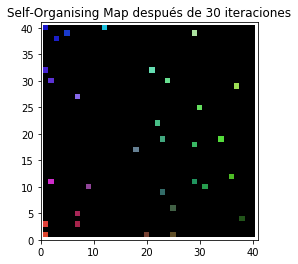

Mapa de Distancias:
[[0.16016361 0.         0.11285102 ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 30
[0.49019608 0.04313725 0.15294118]
0.1194619450870717
[ 12 , 0 ]
[ 11 , 0 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.49019608 0.04313725 0.15294118]
Coordenadas de la neurona ganadora para la muestra
[11, 0]
Mapa de Activación:
[[1. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 31
Mapa de Clasificación:


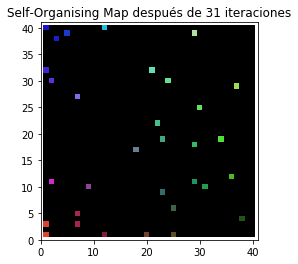

Mapa de Distancias:
[[0.16016361 0.         0.11285102 ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 31
[0.41176471 0.90588235 0.18039216]
0.009291040626373388
[ 39 , 21 ]
[ 38 , 21 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.41176471 0.90588235 0.18039216]
Coordenadas de la neurona ganadora para la muestra
[38, 21]
Mapa de Activación:
[[1. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 32
Mapa de Clasificación:


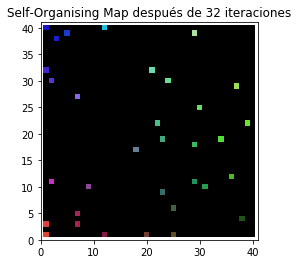

Mapa de Distancias:
[[0.16016361 0.         0.11285102 ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 32
[0.48235294 0.95686275 0.01176471]
0.16348201445444355
[ 39 , 19 ]
[ 39 , 18 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.48235294 0.95686275 0.01176471]
Coordenadas de la neurona ganadora para la muestra
[39, 18]
Mapa de Activación:
[[1. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 33
Mapa de Clasificación:


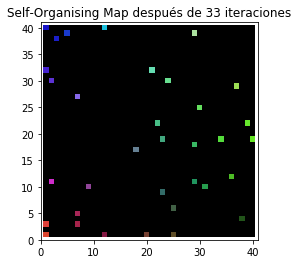

Mapa de Distancias:
[[0.16016361 0.         0.11285102 ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 33
[0.47843137 0.76470588 0.99607843]
0.16832829011849543
[ 14 , 30 ]
[ 14 , 29 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.47843137 0.76470588 0.99607843]
Coordenadas de la neurona ganadora para la muestra
[14, 29]
Mapa de Activación:
[[1. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 34
Mapa de Clasificación:


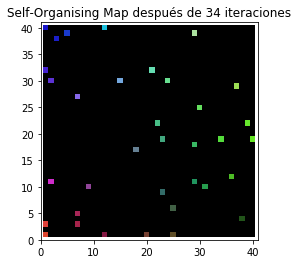

Mapa de Distancias:
[[0.16016361 0.         0.11285102 ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 34
[0.44705882 0.37254902 0.61960784]
0.015291805363670228
[ 13 , 12 ]
[ 14 , 12 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.44705882 0.37254902 0.61960784]
Coordenadas de la neurona ganadora para la muestra
[14, 12]
Mapa de Activación:
[[1. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 35
Mapa de Clasificación:


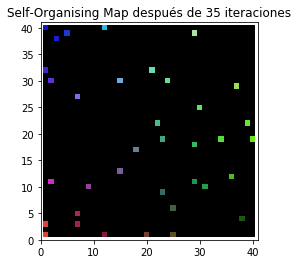

Mapa de Distancias:
[[0.16016361 0.         0.11285102 ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 35
[0.72156863 0.86666667 0.38431373]
0.018201654542647133
[ 35 , 32 ]
[ 34 , 32 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.72156863 0.86666667 0.38431373]
Coordenadas de la neurona ganadora para la muestra
[34, 32]
Mapa de Activación:
[[1. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 36
Mapa de Clasificación:


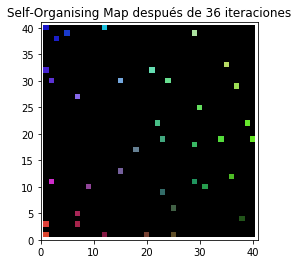

Mapa de Distancias:
[[0.16016361 0.         0.11285102 ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 36
[0.01176471 0.13333333 0.09019608]
0.12843743258151913
[ 39 , 1 ]
[ 39 , 0 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.01176471 0.13333333 0.09019608]
Coordenadas de la neurona ganadora para la muestra
[39, 0]
Mapa de Activación:
[[1. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]] 37
Mapa de Clasificación:


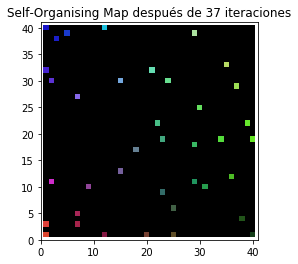

Mapa de Distancias:
[[0.16016361 0.         0.11285102 ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.         0.        ]] 37
[0.35294118 0.11764706 0.31372549]
0.11146791180717965
[ 15 , 2 ]
[ 15 , 3 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.35294118 0.11764706 0.31372549]
Coordenadas de la neurona ganadora para la muestra
[15, 3]
Mapa de Activación:
[[1. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]] 38
Mapa de Clasificación:


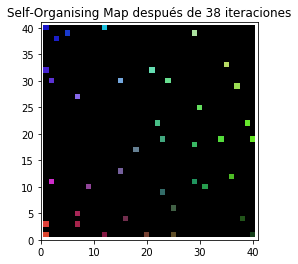

Mapa de Distancias:
[[0.16016361 0.         0.11285102 ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.         0.        ]] 38
[0.99607843 0.9372549  0.45882353]
0.17202781335565426
[ 35 , 39 ]
[ 34 , 39 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.99607843 0.9372549  0.45882353]
Coordenadas de la neurona ganadora para la muestra
[34, 39]
Mapa de Activación:
[[1. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]] 39
Mapa de Clasificación:


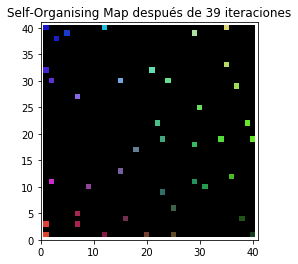

Mapa de Distancias:
[[0.16016361 0.         0.11285102 ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.         0.        ]] 39
[0.55686275 0.36078431 0.16862745]
0.14684279711498469
[ 21 , 0 ]
[ 20 , 0 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.55686275 0.36078431 0.16862745]
Coordenadas de la neurona ganadora para la muestra
[20, 0]
Mapa de Activación:
[[1. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]] 40
Mapa de Clasificación:


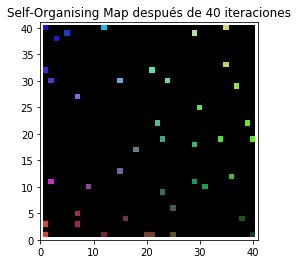

Mapa de Distancias:
[[0.16016361 0.         0.11285102 ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.         0.        ]] 40
[0.35294118 0.15294118 0.16470588]
0.12088027730266193
[ 16 , 1 ]
[ 16 , 0 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.35294118 0.15294118 0.16470588]
Coordenadas de la neurona ganadora para la muestra
[16, 0]
Mapa de Activación:
[[1. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]] 41
Mapa de Clasificación:


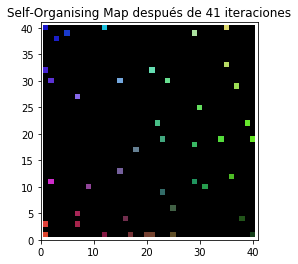

Mapa de Distancias:
[[0.16016361 0.         0.11285102 ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.         0.        ]] 41
[0.18823529 0.03921569 0.98823529]
0.19621686171187888
[ 1 , 33 ]
[ 0 , 33 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.18823529 0.03921569 0.98823529]
Coordenadas de la neurona ganadora para la muestra
[0, 33]
Mapa de Activación:
[[1. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]] 42
Mapa de Clasificación:


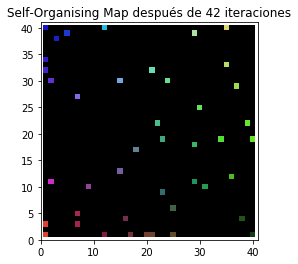

Mapa de Distancias:
[[0.16016361 0.         0.11285102 ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.         0.        ]] 42
[0.34901961 0.32941176 0.64705882]
0.07490378648872387
[ 17 , 9 ]
[ 16 , 10 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.34901961 0.32941176 0.64705882]
Coordenadas de la neurona ganadora para la muestra
[16, 10]
Mapa de Activación:
[[1. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]] 43
Mapa de Clasificación:


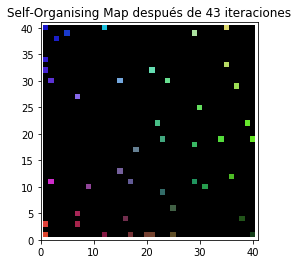

Mapa de Distancias:
[[0.16016361 0.         0.11285102 ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.         0.        ]] 43
[0.78823529 0.90196078 0.61960784]
0.05523037485942107
[ 31 , 39 ]
[ 30 , 39 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.78823529 0.90196078 0.61960784]
Coordenadas de la neurona ganadora para la muestra
[30, 39]
Mapa de Activación:
[[1. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]] 44
Mapa de Clasificación:


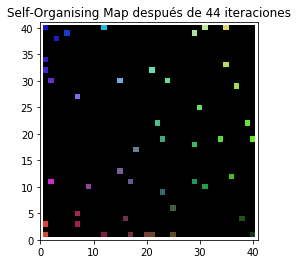

Mapa de Distancias:
[[0.16016361 0.         0.11285102 ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.         0.        ]] 44
[0.57647059 0.23921569 1.        ]
0.10919686239849137
[ 1 , 22 ]
[ 1 , 21 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.57647059 0.23921569 1.        ]
Coordenadas de la neurona ganadora para la muestra
[1, 21]
Mapa de Activación:
[[1. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]] 45
Mapa de Clasificación:


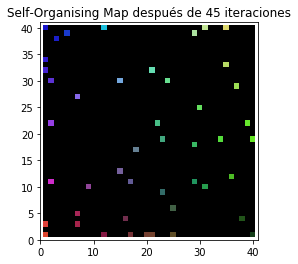

Mapa de Distancias:
[[0.16016361 0.         0.11285102 ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.         0.        ]] 45
[0.95294118 0.56078431 0.40392157]
0.24897475220253792
[ 39 , 38 ]
[ 39 , 39 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.95294118 0.56078431 0.40392157]
Coordenadas de la neurona ganadora para la muestra
[39, 39]
Mapa de Activación:
[[1. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]] 46
Mapa de Clasificación:


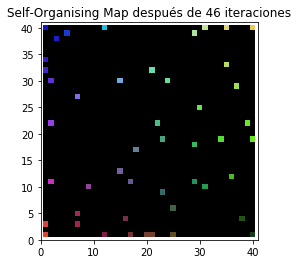

Mapa de Distancias:
[[0.16016361 0.         0.11285102 ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.         0.24897475]] 46
[0.31764706 0.94901961 0.23137255]
0.07294681558825093
[ 34 , 21 ]
[ 34 , 20 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.31764706 0.94901961 0.23137255]
Coordenadas de la neurona ganadora para la muestra
[34, 20]
Mapa de Activación:
[[1. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]] 47
Mapa de Clasificación:


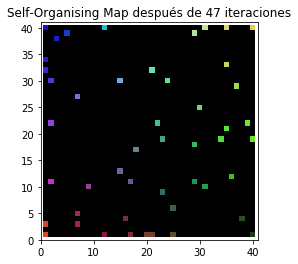

Mapa de Distancias:
[[0.16016361 0.         0.11285102 ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.         0.24897475]] 47
[0.67843137 0.49019608 0.72156863]
0.03642874702692055
[ 11 , 19 ]
[ 10 , 19 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.67843137 0.49019608 0.72156863]
Coordenadas de la neurona ganadora para la muestra
[10, 19]
Mapa de Activación:
[[1. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]] 48
Mapa de Clasificación:


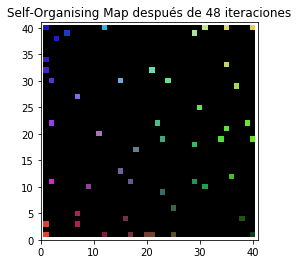

Mapa de Distancias:
[[0.16016361 0.         0.11285102 ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.         0.24897475]] 48
[0.94509804 0.4745098  0.04705882]
0.2091625632380248
[ 0 , 1 ]
[ 0 , 0 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.94509804 0.4745098  0.04705882]
Coordenadas de la neurona ganadora para la muestra
[0, 0]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]] 49
Mapa de Clasificación:


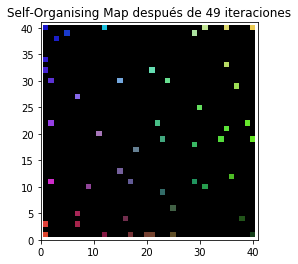

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.         0.24897475]] 49
[0.00784314 0.07843137 0.8745098 ]
0.12122204825020147
[ 2 , 39 ]
[ 1 , 39 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.00784314 0.07843137 0.8745098 ]
Coordenadas de la neurona ganadora para la muestra
[1, 39]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]] 50
Mapa de Clasificación:


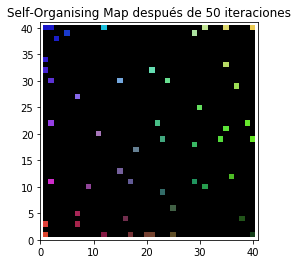

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.         0.24897475]] 50
[0.09803922 0.63921569 0.38431373]
0.05433833639428587
[ 28 , 12 ]
[ 29 , 11 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.09803922 0.63921569 0.38431373]
Coordenadas de la neurona ganadora para la muestra
[29, 11]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]] 51
Mapa de Clasificación:


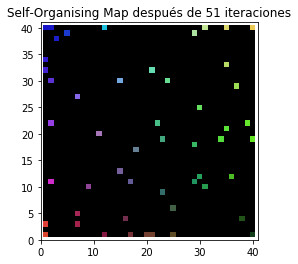

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.11699907]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.         0.24897475]] 51
[0.02352941 0.01960784 0.69411765]
0.12214717793790858
[ 1 , 39 ]
[ 0 , 39 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.02352941 0.01960784 0.69411765]
Coordenadas de la neurona ganadora para la muestra
[0, 39]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]] 52
Mapa de Clasificación:


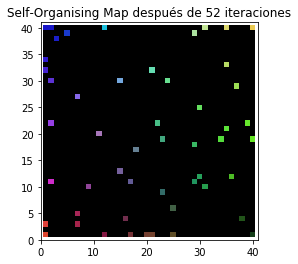

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.         0.24897475]] 52
[0.27058824 0.90588235 0.5372549 ]
0.09313491978135041
[ 24 , 24 ]
[ 22 , 25 ]
El flgVecinas =  1
-----------------------------------------
Muestra:
[0.27058824 0.90588235 0.5372549 ]
Coordenadas de la neurona ganadora para la muestra
[22, 25]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]] 53
Mapa de Clasificación:


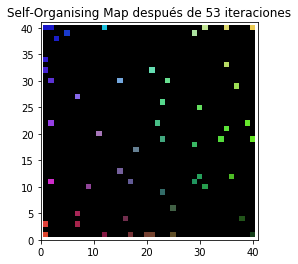

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.         0.24897475]] 53
[0.62745098 0.39215686 0.95294118]
0.09696867432187992
[ 6 , 24 ]
[ 5 , 23 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.62745098 0.39215686 0.95294118]
Coordenadas de la neurona ganadora para la muestra
[5, 23]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]] 54
Mapa de Clasificación:


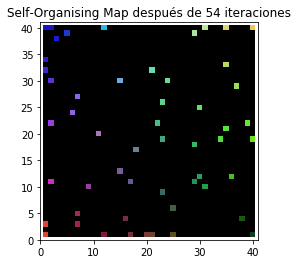

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.         0.24897475]] 54
[0.30980392 0.39607843 0.08627451]
0.0995518754046655
[ 28 , 0 ]
[ 27 , 0 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.30980392 0.39607843 0.08627451]
Coordenadas de la neurona ganadora para la muestra
[27, 0]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]] 55
Mapa de Clasificación:


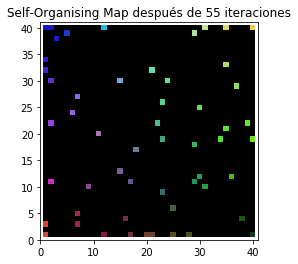

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.         0.24897475]] 55
[0.69411765 0.34901961 0.23921569]
0.16017682695121854
[ 4 , 1 ]
[ 4 , 0 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.69411765 0.34901961 0.23921569]
Coordenadas de la neurona ganadora para la muestra
[4, 0]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]] 56
Mapa de Clasificación:


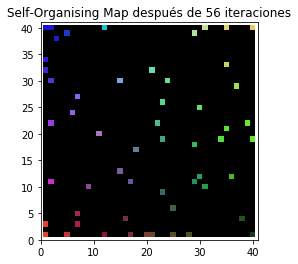

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.         0.24897475]] 56
[0.77647059 0.61176471 0.72941176]
0.18961731986884034
[ 12 , 20 ]
[ 11 , 20 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.77647059 0.61176471 0.72941176]
Coordenadas de la neurona ganadora para la muestra
[11, 20]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]] 57
Mapa de Clasificación:


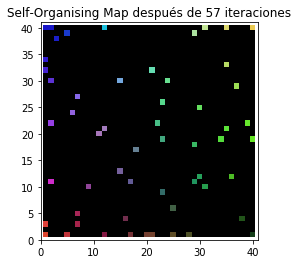

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.         0.24897475]] 57
[0.84705882 0.0745098  0.96470588]
0.14436091686783117
[ 0 , 14 ]
[ 0 , 13 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.84705882 0.0745098  0.96470588]
Coordenadas de la neurona ganadora para la muestra
[0, 13]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]] 58
Mapa de Clasificación:


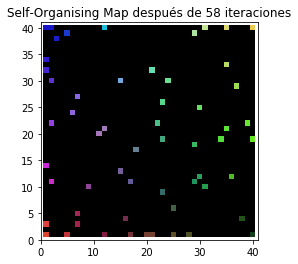

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.         0.24897475]] 58
[0.09019608 0.57647059 0.9254902 ]
0.08278544330650348
[ 9 , 39 ]
[ 8 , 39 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.09019608 0.57647059 0.9254902 ]
Coordenadas de la neurona ganadora para la muestra
[8, 39]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]] 59
Mapa de Clasificación:


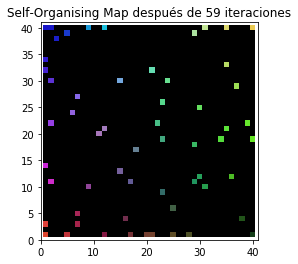

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.         0.24897475]] 59
[0.43137255 0.04705882 0.54509804]
0.1667656261027703
[ 11 , 6 ]
[ 11 , 5 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.43137255 0.04705882 0.54509804]
Coordenadas de la neurona ganadora para la muestra
[11, 5]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]] 60
Mapa de Clasificación:


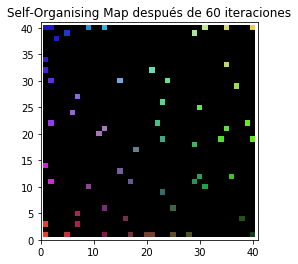

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.         0.24897475]] 60
[0.62352941 0.35294118 0.63137255]
0.025564597838955018
[ 8 , 13 ]
[ 8 , 12 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.62352941 0.35294118 0.63137255]
Coordenadas de la neurona ganadora para la muestra
[8, 12]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]] 61
Mapa de Clasificación:


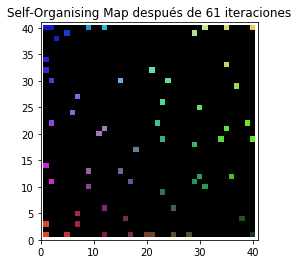

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.         0.24897475]] 61
[0.5254902  0.         0.30196078]
0.09462028313296225
[ 10 , 2 ]
[ 10 , 1 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.5254902  0.         0.30196078]
Coordenadas de la neurona ganadora para la muestra
[10, 1]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]] 62
Mapa de Clasificación:


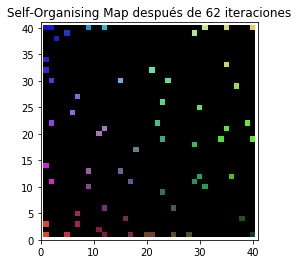

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.         0.24897475]] 62
[0.68627451 0.85882353 0.49019608]
0.014710454772094912
[ 32 , 34 ]
[ 31 , 34 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.68627451 0.85882353 0.49019608]
Coordenadas de la neurona ganadora para la muestra
[31, 34]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]] 63
Mapa de Clasificación:


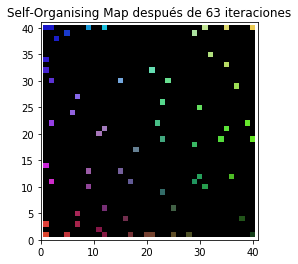

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.         0.24897475]] 63
[0.65490196 0.79215686 0.24705882]
0.07043252724143599
[ 39 , 30 ]
[ 39 , 29 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.65490196 0.79215686 0.24705882]
Coordenadas de la neurona ganadora para la muestra
[39, 29]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]] 64
Mapa de Clasificación:


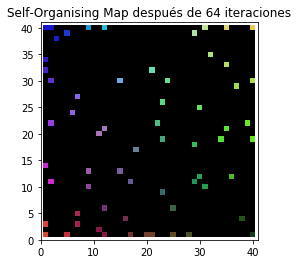

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.         0.24897475]] 64
[0.88235294 0.09411765 0.68627451]
0.0671764167382366
[ 1 , 8 ]
[ 0 , 8 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.88235294 0.09411765 0.68627451]
Coordenadas de la neurona ganadora para la muestra
[0, 8]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]] 65
Mapa de Clasificación:


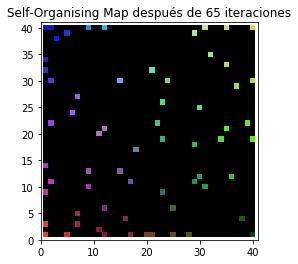

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.         0.24897475]] 65
[0.41568627 0.88627451 0.03921569]
0.09030419467611926
[ 39 , 16 ]
[ 39 , 15 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.41568627 0.88627451 0.03921569]
Coordenadas de la neurona ganadora para la muestra
[39, 15]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]] 66
Mapa de Clasificación:


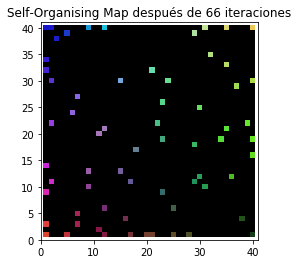

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.         0.24897475]] 66
[0.10196078 0.25882353 0.27058824]
0.1428934357946192
[ 34 , 1 ]
[ 33 , 1 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.10196078 0.25882353 0.27058824]
Coordenadas de la neurona ganadora para la muestra
[33, 1]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]] 67
Mapa de Clasificación:


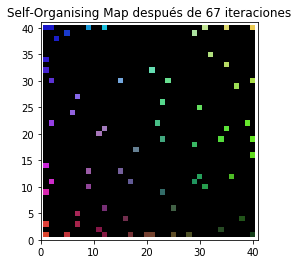

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.         0.24897475]] 67
[0.44313725 0.94117647 0.8       ]
0.07497038441721506
[ 20 , 39 ]
[ 20 , 38 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.44313725 0.94117647 0.8       ]
Coordenadas de la neurona ganadora para la muestra
[20, 38]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]] 68
Mapa de Clasificación:


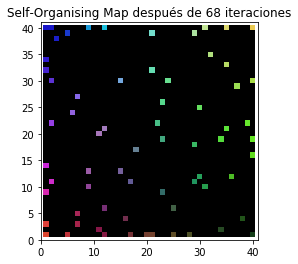

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.         0.24897475]] 68
[0.5254902  0.29803922 0.14509804]
0.11878797486632445
[ 21 , 0 ]
[ 20 , 0 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.5254902  0.29803922 0.14509804]
Coordenadas de la neurona ganadora para la muestra
[20, 0]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]] 69
Mapa de Clasificación:


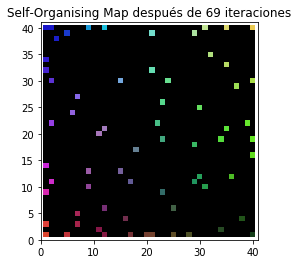

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.         0.24897475]] 69
[0.7372549  0.44313725 0.63137255]
0.11114760920547301
[ 8 , 17 ]
[ 8 , 16 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.7372549  0.44313725 0.63137255]
Coordenadas de la neurona ganadora para la muestra
[8, 16]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]] 70
Mapa de Clasificación:


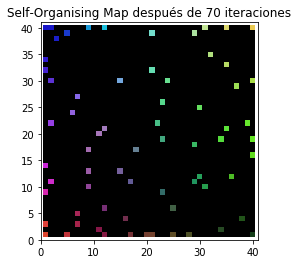

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.         0.24897475]] 70
[0.92941176 0.07843137 0.29019608]
0.16999182824396203
[ 1 , 4 ]
[ 0 , 4 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.92941176 0.07843137 0.29019608]
Coordenadas de la neurona ganadora para la muestra
[0, 4]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]] 71
Mapa de Clasificación:


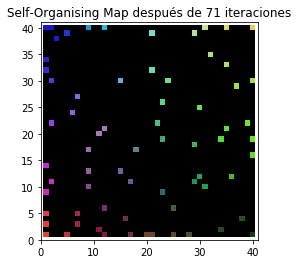

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.         0.24897475]] 71
[0.43529412 0.25882353 0.16078431]
0.016560619020188645
[ 22 , 0 ]
[ 21 , 0 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.43529412 0.25882353 0.16078431]
Coordenadas de la neurona ganadora para la muestra
[21, 0]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]] 72
Mapa de Clasificación:


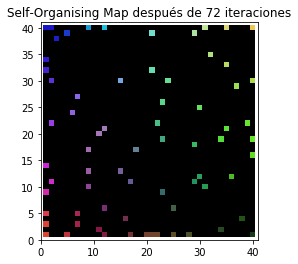

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.         0.24897475]] 72
[0.36470588 0.60784314 0.        ]
0.11813239882660996
[ 39 , 9 ]
[ 39 , 8 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.36470588 0.60784314 0.        ]
Coordenadas de la neurona ganadora para la muestra
[39, 8]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]] 73
Mapa de Clasificación:


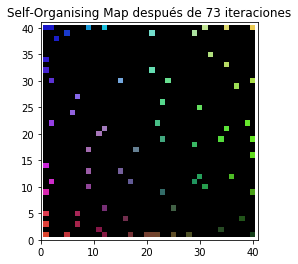

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.         0.24897475]] 73
[0.14509804 0.00784314 0.8       ]
0.08321884434075304
[ 0 , 37 ]
[ 0 , 36 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.14509804 0.00784314 0.8       ]
Coordenadas de la neurona ganadora para la muestra
[0, 36]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]] 74
Mapa de Clasificación:


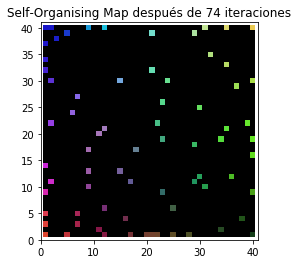

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.         0.24897475]] 74
[0.48627451 0.38823529 0.62352941]
0.006222968828688432
[ 14 , 13 ]
[ 13 , 13 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.48627451 0.38823529 0.62352941]
Coordenadas de la neurona ganadora para la muestra
[13, 13]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]] 75
Mapa de Clasificación:


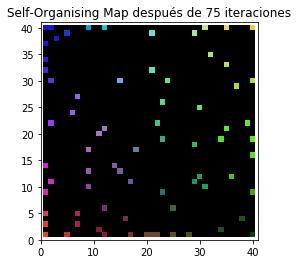

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.         0.24897475]] 75
[0.98039216 0.83137255 0.05098039]
0.27278493922774855
[ 39 , 39 ]
[ 39 , 38 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.98039216 0.83137255 0.05098039]
Coordenadas de la neurona ganadora para la muestra
[39, 38]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 1.]] 76
Mapa de Clasificación:


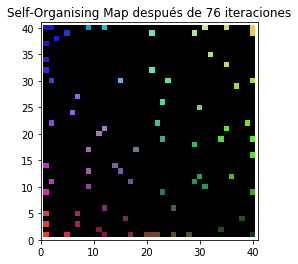

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.27278494 0.24897475]] 76
[0.08627451 0.41176471 0.45098039]
0.11230510324745759
[ 23 , 8 ]
[ 23 , 9 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.08627451 0.41176471 0.45098039]
Coordenadas de la neurona ganadora para la muestra
[23, 9]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 1.]] 77
Mapa de Clasificación:


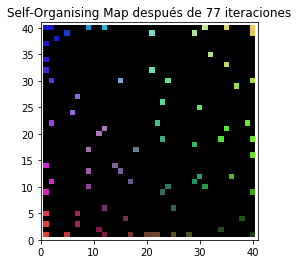

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.27278494 0.24897475]] 77
[0.51372549 0.48627451 0.8745098 ]
0.04582626942594808
[ 9 , 26 ]
[ 9 , 28 ]
El flgVecinas =  1
-----------------------------------------
Muestra:
[0.51372549 0.48627451 0.8745098 ]
Coordenadas de la neurona ganadora para la muestra
[9, 28]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 1.]] 78
Mapa de Clasificación:


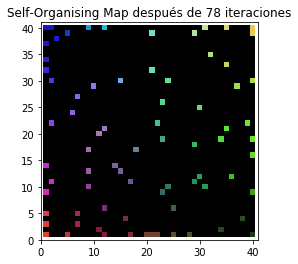

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.27278494 0.24897475]] 78
[0.16078431 0.67058824 0.82352941]
0.045534495291377486
[ 9 , 36 ]
[ 9 , 35 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.16078431 0.67058824 0.82352941]
Coordenadas de la neurona ganadora para la muestra
[9, 35]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 1.]] 79
Mapa de Clasificación:


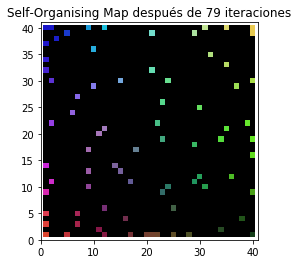

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.27278494 0.24897475]] 79
[0.51372549 0.82352941 0.51764706]
0.04238317548862954
[ 29 , 30 ]
[ 28 , 30 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.51372549 0.82352941 0.51764706]
Coordenadas de la neurona ganadora para la muestra
[28, 30]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 1.]] 80
Mapa de Clasificación:


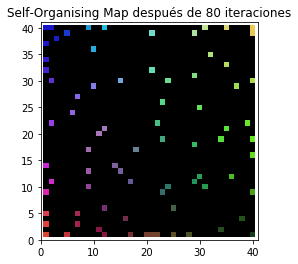

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.27278494 0.24897475]] 80
[0.41176471 0.88627451 0.23529412]
0.015418373606812936
[ 35 , 23 ]
[ 34 , 22 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.41176471 0.88627451 0.23529412]
Coordenadas de la neurona ganadora para la muestra
[34, 22]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 1.]] 81
Mapa de Clasificación:


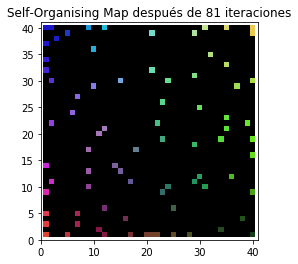

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.27278494 0.24897475]] 81
[0.10588235 0.89019608 0.8       ]
0.10680804021825711
[ 14 , 39 ]
[ 14 , 38 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.10588235 0.89019608 0.8       ]
Coordenadas de la neurona ganadora para la muestra
[14, 38]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 1.]] 82
Mapa de Clasificación:


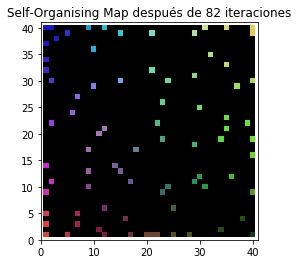

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.27278494 0.24897475]] 82
[0.2627451  0.31372549 0.1372549 ]
0.017742835595821387
[ 30 , 0 ]
[ 29 , 0 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.2627451  0.31372549 0.1372549 ]
Coordenadas de la neurona ganadora para la muestra
[29, 0]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 1.]] 83
Mapa de Clasificación:


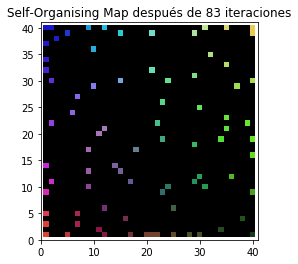

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.27278494 0.24897475]] 83
[0.24313725 0.88627451 0.87058824]
0.05897981169520022
[ 16 , 38 ]
[ 16 , 37 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.24313725 0.88627451 0.87058824]
Coordenadas de la neurona ganadora para la muestra
[16, 37]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 1.]] 84
Mapa de Clasificación:


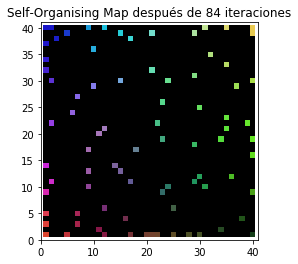

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.27278494 0.24897475]] 84
[0.88235294 0.0745098  0.9254902 ]
0.13394756966740265
[ 0 , 13 ]
[ 0 , 12 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.88235294 0.0745098  0.9254902 ]
Coordenadas de la neurona ganadora para la muestra
[0, 12]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 1.]] 85
Mapa de Clasificación:


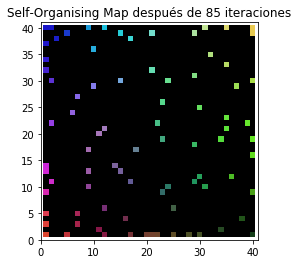

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.27278494 0.24897475]] 85
[0.49411765 0.86666667 0.52941176]
0.030191717310747063
[ 28 , 29 ]
[ 28 , 30 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.49411765 0.86666667 0.52941176]
Coordenadas de la neurona ganadora para la muestra
[28, 30]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 1.]] 86
Mapa de Clasificación:


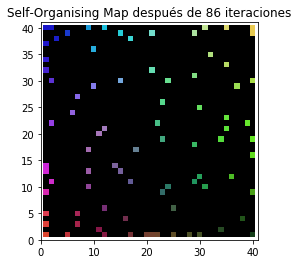

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.27278494 0.24897475]] 86
[0.21960784 0.19607843 0.74117647]
0.07925794496980142
[ 3 , 34 ]
[ 3 , 33 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.21960784 0.19607843 0.74117647]
Coordenadas de la neurona ganadora para la muestra
[3, 33]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 1.]] 87
Mapa de Clasificación:


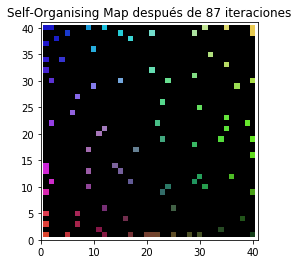

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.27278494 0.24897475]] 87
[0.4745098  0.15294118 0.79607843]
0.08899872659801734
[ 0 , 27 ]
[ 0 , 26 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.4745098  0.15294118 0.79607843]
Coordenadas de la neurona ganadora para la muestra
[0, 26]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 1.]] 88
Mapa de Clasificación:


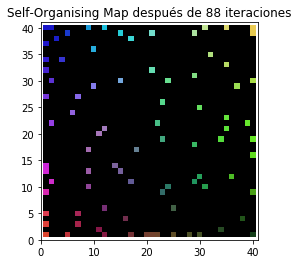

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.27278494 0.24897475]] 88
[0.69411765 0.09019608 0.88235294]
0.0765520388685722
[ 0 , 17 ]
[ 0 , 16 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.69411765 0.09019608 0.88235294]
Coordenadas de la neurona ganadora para la muestra
[0, 16]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 1.]] 89
Mapa de Clasificación:


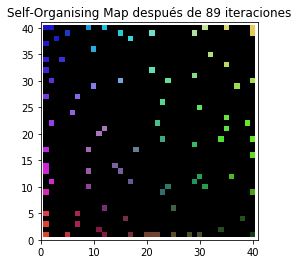

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.27278494 0.24897475]] 89
[0.37647059 0.29019608 0.59607843]
0.047744035052088386
[ 16 , 9 ]
[ 16 , 8 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.37647059 0.29019608 0.59607843]
Coordenadas de la neurona ganadora para la muestra
[16, 8]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 1.]] 90
Mapa de Clasificación:


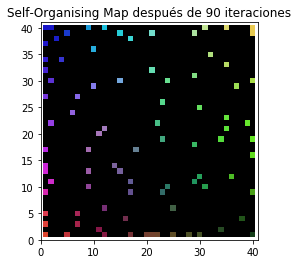

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.27278494 0.24897475]] 90
[0.00392157 0.7372549  0.8745098 ]
0.09306002426415881
[ 11 , 39 ]
[ 10 , 39 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.00392157 0.7372549  0.8745098 ]
Coordenadas de la neurona ganadora para la muestra
[10, 39]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 1.]] 91
Mapa de Clasificación:


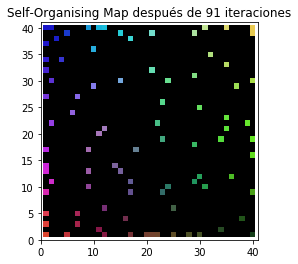

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.27278494 0.24897475]] 91
[0.54509804 0.25490196 0.85882353]
0.02445161558373933
[ 1 , 24 ]
[ 1 , 23 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.54509804 0.25490196 0.85882353]
Coordenadas de la neurona ganadora para la muestra
[1, 23]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 1.]] 92
Mapa de Clasificación:


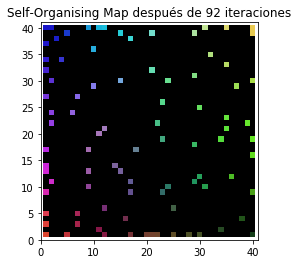

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.27278494 0.24897475]] 92
[0.61960784 0.39215686 0.6627451 ]
0.01334577773475211
[ 8 , 14 ]
[ 8 , 13 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.61960784 0.39215686 0.6627451 ]
Coordenadas de la neurona ganadora para la muestra
[8, 13]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 1.]] 93
Mapa de Clasificación:


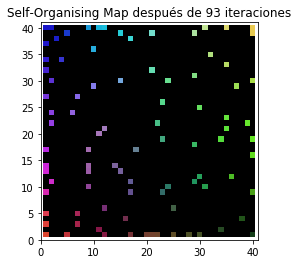

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.27278494 0.24897475]] 93
[0.7372549  0.78823529 0.8745098 ]
0.21139205023732782
[ 24 , 38 ]
[ 24 , 39 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.7372549  0.78823529 0.8745098 ]
Coordenadas de la neurona ganadora para la muestra
[24, 39]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 1.]] 94
Mapa de Clasificación:


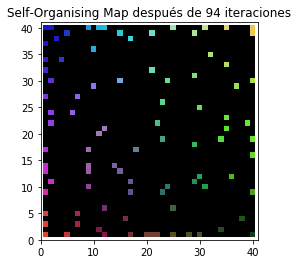

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.27278494 0.24897475]] 94
[0.52941176 0.4627451  0.94509804]
0.034524025691170336
[ 9 , 27 ]
[ 8 , 26 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.52941176 0.4627451  0.94509804]
Coordenadas de la neurona ganadora para la muestra
[8, 26]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 1.]] 95
Mapa de Clasificación:


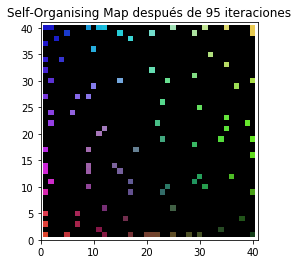

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12843743 0.         0.         ... 0.         0.27278494 0.24897475]] 95
[0.00392157 0.18431373 0.01568627]
0.12684879047671488
[ 39 , 1 ]
[ 39 , 0 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.00392157 0.18431373 0.01568627]
Coordenadas de la neurona ganadora para la muestra
[39, 0]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [2. 0. 0. ... 0. 1. 1.]] 96
Mapa de Clasificación:


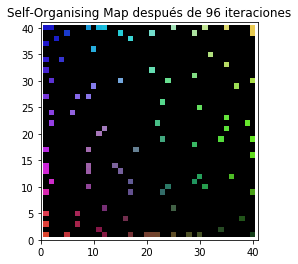

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12684879 0.         0.         ... 0.         0.27278494 0.24897475]] 96
[0.65490196 0.03137255 0.81176471]
0.11873151395052267
[ 0 , 17 ]
[ 0 , 16 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.65490196 0.03137255 0.81176471]
Coordenadas de la neurona ganadora para la muestra
[0, 16]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [2. 0. 0. ... 0. 1. 1.]] 97
Mapa de Clasificación:


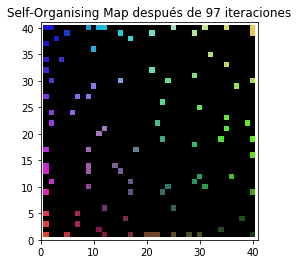

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12684879 0.         0.         ... 0.         0.27278494 0.24897475]] 97
[0.56862745 0.05490196 0.03529412]
0.2161953846644044
[ 10 , 0 ]
[ 9 , 0 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.56862745 0.05490196 0.03529412]
Coordenadas de la neurona ganadora para la muestra
[9, 0]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [2. 0. 0. ... 0. 1. 1.]] 98
Mapa de Clasificación:


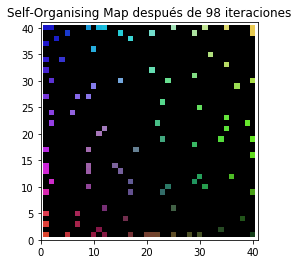

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12684879 0.         0.         ... 0.         0.27278494 0.24897475]] 98
[0.2627451  0.88235294 0.54509804]
0.0892739997629601
[ 23 , 24 ]
[ 22 , 25 ]
El flgVecinas =  0
-----------------------------------------
Muestra:
[0.2627451  0.88235294 0.54509804]
Coordenadas de la neurona ganadora para la muestra
[22, 25]
Mapa de Activación:
[[2. 0. 1. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [2. 0. 0. ... 0. 1. 1.]] 99
Mapa de Clasificación:


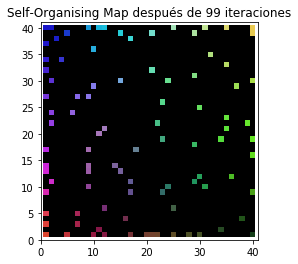

Mapa de Distancias:
[[0.20916256 0.         0.11285102 ... 0.         0.         0.12214718]
 [0.         0.         0.         ... 0.         0.         0.12122205]
 [0.         0.         0.         ... 0.05874414 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12684879 0.         0.         ... 0.         0.27278494 0.24897475]] 99
El número de clases generadas es de:  93 .
El error de cuantificación del mapa de kohonen es de una distancia de:  0.08876330010605907
El error topológico es de:  0.04


In [26]:
# Clasifica el vector datos, el dataset original sobre el que se ha entrenado la red neuronal.

#Reiniciamos las variables para CLASIFICACION
mapa_clasificacion = np.zeros((lado_mapa,lado_mapa,len(datos[0])))
mapa_activacion = np.zeros((lado_mapa,lado_mapa))
mapa_distancias = np.zeros((lado_mapa,lado_mapa))

#Vartiable interna
error_topologico = 0
contador = 0

for i in range (datos.shape[0]):
    #Cogemos el valor de dato i, ya está normalizado.
    muestra = datos[i]
    print(muestra)
    #Clasificamos patrón
    mapa_clasificacion,mapa_activacion,mapa_distancias,bmuClasidx = ClasPatron(muestra, matriz_pesos, mapa_activacion, mapa_clasificacion, mapa_distancias)
    
    #Calculamos el error Topológico (Debe conocer el vector de entrada siempre) y lo vamos calculando progresivamente.
    error_topologico += Error_Topologico(matriz_pesos, muestra)
    if i==datos.shape[0]-1:
        error_topologico = error_topologico/datos.shape[0]

    #Muestra de los datos
    print("-----------------------------------------")
    print("Muestra:")
    print(muestra)
    print("Coordenadas de la neurona ganadora para la muestra")
    print(bmuClasidx)
    print("Mapa de Activación:")
    print(mapa_activacion, i)
    print("Mapa de Clasificación:")
    pintar_mapa(mapa_clasificacion, i)
    print("Mapa de Distancias:")
    print(mapa_distancias, i)

for i in range (mapa_activacion.shape[0]):
        for j in range (mapa_activacion.shape[1]): 
            if mapa_activacion[i][j] != 0:
                contador+=1
print("El número de clases generadas es de: ",contador,".")

ImprimirErrores()

### **MAPA ACTIVACIONES HISTOGRAMA 3D**


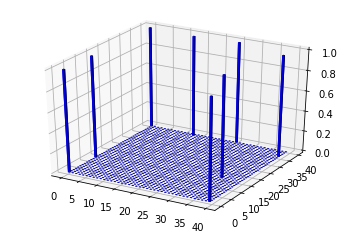

In [28]:
#print(mapa_activacion)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xpos = [range(mapa_activacion.shape[0])]
ypos = [range(mapa_activacion.shape[1])]
xpos, ypos = np.meshgrid(xpos, ypos)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = mapa_activacion.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

plt.show()